# Overview

ML classification and visualizations on world data, to determine whether a country is good or bad, from a technology business standpoint

# Set Up

In [1]:
import pandas as pd
import numpy as np




#%matplotlib notebook to make interactive within same window as JN
#%matplotlib
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

#SciKit Learn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

from sklearn import preprocessing
from sklearn.decomposition import PCA

#Plotly
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import scipy as sci
import statsmodels as stats

In [2]:
WorldData = pd.read_csv("WorldMarketData.csv", na_values = '..')

In [3]:
df_original = pd.DataFrame(WorldData)

In [4]:
df_original.head(5)

Country Name Country Code  \
0  United States          USA   
1  United States          USA   
2  United States          USA   
3  United States          USA   
4  United States          USA   

                                         Series Name        Series Code  \
0  Agricultural raw materials exports (% of merch...  TX.VAL.AGRI.ZS.UN   
1  Agricultural raw materials imports (% of merch...  TM.VAL.AGRI.ZS.UN   
2  Average time to clear exports through customs ...     IC.CUS.DURS.EX   
3  Bribery incidence (% of firms experiencing at ...     IC.FRM.BRIB.ZS   
4               Changes in inventories (current US$)     NE.GDI.STKB.CD   

   1994 [YR1994]  1995 [YR1995]  1996 [YR1996]  1997 [YR1997]  1998 [YR1998]  \
0   3.489054e+00   3.862870e+00   3.072678e+00   2.672196e+00   2.349922e+00   
1   2.039822e+00   2.109302e+00   2.038878e+00   1.905393e+00   1.732082e+00   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4   6.378500e+10   3.117400e+10   3.079900e+10   7.092700e+10   6.371900e+10   

   1999 [YR1999]  ...  2009 [YR2009]  2010 [YR2010]  2011 [YR2011]  \
0   2.077064e+00  ...   2.312439e+00   2.631247e+00   2.797122e+00   
1   1.655295e+00  ...   8.455062e-01   9.566944e-01   9.781623e-01   
2            NaN  ...            NaN            NaN            NaN   
3            NaN  ...            NaN            NaN            NaN   
4   6.081600e+10  ...  -1.507720e+11   5.391700e+10   4.626200e+10   

   2012 [YR2012]  2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  \
0   2.454702e+00   2.419247e+00   2.298727e+00   2.268231e+00   2.300885e+00   
1   8.823180e-01   9.095306e-01   9.293951e-01   9.102306e-01   9.531644e-01   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4   7.121200e+10   1.045310e+11   8.449000e+10   1.287240e+11   2.894000e+10   

   2017 [YR2017]  2018 [YR2018]  
0   2.310487e+00       2.260732  
1   9.137861e-01       0.881986  
2            NaN            NaN  
3            NaN            NaN  
4   2.548400e+10            NaN  

[5 rows x 29 columns]

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
df_original.columns = ['country', 'country_code', 'series', 'series_code', '1994', '1995', '1996', '1997', '1998', 
             '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
             '2012', '2013', '2014', '2015', '2016', '2017', '2018']

df_original.columns[:]

df_original.info()

In [7]:
df = df_original.drop(columns=['country_code', 'series_code'])

In [8]:
df.head()

country                                             series  \
0  United States  Agricultural raw materials exports (% of merch...   
1  United States  Agricultural raw materials imports (% of merch...   
2  United States  Average time to clear exports through customs ...   
3  United States  Bribery incidence (% of firms experiencing at ...   
4  United States               Changes in inventories (current US$)   

               1994              1995              1996              1997  \
0              3.49              3.86              3.07              2.67   
1              2.04              2.11              2.04              1.91   
2               nan               nan               nan               nan   
3               nan               nan               nan               nan   
4 63,785,000,000.00 31,174,000,000.00 30,799,000,000.00 70,927,000,000.00   

               1998              1999              2000               2001  \
0              2.35              2.08              2.27               2.31   
1              1.73              1.66              1.38               1.35   
2               nan               nan               nan                nan   
3               nan               nan               nan                nan   
4 63,719,000,000.00 60,816,000,000.00 54,544,000,000.00 -38,284,000,000.00   

   ...                2009              2010              2011  \
0  ...                2.31              2.63              2.80   
1  ...                0.85              0.96              0.98   
2  ...                 nan               nan               nan   
3  ...                 nan               nan               nan   
4  ... -150,772,000,000.00 53,917,000,000.00 46,262,000,000.00   

               2012               2013              2014               2015  \
0              2.45               2.42              2.30               2.27   
1              0.88               0.91              0.93               0.91   
2               nan                nan               nan                nan   
3               nan                nan               nan                nan   
4 71,212,000,000.00 104,531,000,000.00 84,490,000,000.00 128,724,000,000.00   

               2016              2017  2018  
0              2.30              2.31  2.26  
1              0.95              0.91  0.88  
2               nan               nan   nan  
3               nan               nan   nan  
4 28,940,000,000.00 25,484,000,000.00   nan  

[5 rows x 27 columns]

In [9]:
df.tail(10)

country  \
3795                                       High income   
3796                                       High income   
3797                                       High income   
3798                                       High income   
3799                                       High income   
3800                                               NaN   
3801                                               NaN   
3802                                               NaN   
3803  Data from database: World Development Indicators   
3804                          Last Updated: 07/10/2019   

                                              series  1994  1995  1996  1997  \
3795       Time to export, border compliance (hours)   nan   nan   nan   nan   
3796       Time to import, border compliance (hours)   nan   nan   nan   nan   
3797  Time to export, documentary compliance (hours)   nan   nan   nan   nan   
3798  Time to import, documentary compliance (hours)   nan   nan   nan   nan   
3799                                Trade (% of GDP) 41.45 43.77 44.32 46.35   
3800                                             NaN   nan   nan   nan   nan   
3801                                             NaN   nan   nan   nan   nan   
3802                                             NaN   nan   nan   nan   nan   
3803                                             NaN   nan   nan   nan   nan   
3804                                             NaN   nan   nan   nan   nan   

      1998  1999  2000  2001  ...  2009  2010  2011  2012  2013  2014  2015  \
3795   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan 28.05 26.81   
3796   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan 30.05 27.81   
3797   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan 15.93 15.10   
3798   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan 21.67 20.86   
3799 46.64 46.96 51.53 50.30  ... 53.12 58.39 62.45 62.90 62.83 62.92 61.38   
3800   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan   nan   nan   
3801   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan   nan   nan   
3802   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan   nan   nan   
3803   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan   nan   nan   
3804   nan   nan   nan   nan  ...   nan   nan   nan   nan   nan   nan   nan   

      2016  2017  2018  
3795 26.54 26.42 26.05  
3796 27.78 27.40 27.19  
3797 14.86 13.45 13.08  
3798 19.24 18.67 17.71  
3799 59.66 61.56   nan  
3800   nan   nan   nan  
3801   nan   nan   nan  
3802   nan   nan   nan  
3803   nan   nan   nan  
3804   nan   nan   nan  

[10 rows x 27 columns]

In [10]:
#Get rid of the bottom rows that have no value/meaning
df = df.drop(df.index[3800:])

# Overview of Missing Values

In [11]:
df_overview = df.copy()

In [12]:
df_overview['Missing_Values'] = df_overview.apply(lambda x: x.isna().sum(), axis=1)

In [13]:
df_overview.head()

country                                             series  \
0  United States  Agricultural raw materials exports (% of merch...   
1  United States  Agricultural raw materials imports (% of merch...   
2  United States  Average time to clear exports through customs ...   
3  United States  Bribery incidence (% of firms experiencing at ...   
4  United States               Changes in inventories (current US$)   

               1994              1995              1996              1997  \
0              3.49              3.86              3.07              2.67   
1              2.04              2.11              2.04              1.91   
2               nan               nan               nan               nan   
3               nan               nan               nan               nan   
4 63,785,000,000.00 31,174,000,000.00 30,799,000,000.00 70,927,000,000.00   

               1998              1999              2000               2001  \
0              2.35              2.08              2.27               2.31   
1              1.73              1.66              1.38               1.35   
2               nan               nan               nan                nan   
3               nan               nan               nan                nan   
4 63,719,000,000.00 60,816,000,000.00 54,544,000,000.00 -38,284,000,000.00   

   ...              2010              2011              2012  \
0  ...              2.63              2.80              2.45   
1  ...              0.96              0.98              0.88   
2  ...               nan               nan               nan   
3  ...               nan               nan               nan   
4  ... 53,917,000,000.00 46,262,000,000.00 71,212,000,000.00   

                2013              2014               2015              2016  \
0               2.42              2.30               2.27              2.30   
1               0.91              0.93               0.91              0.95   
2                nan               nan                nan               nan   
3                nan               nan                nan               nan   
4 104,531,000,000.00 84,490,000,000.00 128,724,000,000.00 28,940,000,000.00   

               2017  2018  Missing_Values  
0              2.31  2.26               0  
1              0.91  0.88               0  
2               nan   nan              25  
3               nan   nan              25  
4 25,484,000,000.00   nan               1  

[5 rows x 28 columns]

In [14]:
df_overview = df_overview.drop(columns = ['1994', '1995', '1996', '1997', '1998', 
             '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
             '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [15]:
df_overview.head()

country                                             series  \
0  United States  Agricultural raw materials exports (% of merch...   
1  United States  Agricultural raw materials imports (% of merch...   
2  United States  Average time to clear exports through customs ...   
3  United States  Bribery incidence (% of firms experiencing at ...   
4  United States               Changes in inventories (current US$)   

   Missing_Values  
0               0  
1               0  
2              25  
3              25  
4               1

In [16]:
df_overview = df_overview.set_index('country')
#df_overview = df_overview[df_overview.Missing_Values != 0]
df_overview = df_overview.sort_values(by = "Missing_Values", ascending = False)

In [17]:
df_overview.tail(10)

series  \
country                                                                   
Honduras              Industry (including construction), value added...   
Hong Kong SAR, China  Agricultural raw materials exports (% of merch...   
Qatar                                                 GNI (current US$)   
Honduras                   Manufacturing, value added (annual % growth)   
Qatar                                      GDP per capita (current US$)   
Honduras                          Manufacturing, value added (% of GDP)   
Qatar                                                 GDP (current US$)   
Honduras                       Manufacturing, value added (current US$)   
Honduras                                               Trade (% of GDP)   
United States         Agricultural raw materials exports (% of merch...   

                      Missing_Values  
country                               
Honduras                           0  
Hong Kong SAR, China               0  
Qatar                              0  
Honduras                           0  
Qatar                              0  
Honduras                           0  
Qatar                              0  
Honduras                           0  
Honduras                           0  
United States                      0

# Find the Years with the least NaN values/ least missing entries

In [18]:
#Find the years with the least NaN values/ least missing entries
df.isna().sum().sort_values(ascending = True).to_frame()

0
country     0
series      0
2014      546
2016      560
2010      966
2015      974
2012      981
2007      997
2017     1159
2013     1372
2011     1407
2006     1429
2009     1434
2008     1435
2005     1537
2018     1665
2004     1688
2003     1739
2002     1855
2001     1874
2000     1902
1999     1933
1998     1959
1997     1973
1996     1976
1995     2067
1994     2146

# Finding Series with the least NaN Values

In [19]:
#Finding Series with the least NaN Values
df = df.set_index('series')
series_counts = df.isna().sum(axis = 1).sort_values(ascending = True).to_frame()
#Repeats Rows

In [20]:
#Total Missing Values Per Series
series_totals = series_counts.groupby('series').sum()
series_totals_sorted = series_totals.sort_values(0, ascending = True)
series_totals_sorted.head(20)

0
series                                                 
GDP per capita (current US$)                          0
GDP (current US$)                                     0
GNI (current US$)                                     6
GDP per capita growth (annual %)                      7
GDP growth (annual %)                                 7
GNI, Atlas method (current US$)                      14
GNI per capita, Atlas method (current US$)           14
Trade (% of GDP)                                     18
Imports of goods and services (% of GDP)             18
Exports of goods and services (% of GDP)             18
Exports of goods and services (current US$)          37
Imports of goods and services (current US$)          37
Gross capital formation (current US$)                43
Industry (including construction), value added ...   59
Manufacturing, value added (current US$)             83
Manufacturing, value added (% of GDP)                85
Imports of goods and services (annual % growth)      94
GNI per capita growth (annual %)                    103
GNI growth (annual %)                               103
Exports of goods and services (annual % growth)     104

In [21]:
df = df.reset_index()

# Finding Country with the least NaN Values


In [22]:
#Finding Country with the least NaN Values
df = df.set_index('country')
country_counts = df.isna().sum(axis = 1).sort_values(ascending = True).to_frame()
#Repeats Rows

In [23]:
#Total Missing Values Per Country
country_totals = country_counts.groupby('country').sum()
country_totals_sorted = country_totals.sort_values(0, ascending = True)
country_totals_sorted.head(20)

0
country            
Argentina       612
Colombia        654
Korea, Rep.     663
Germany         664
Singapore       668
United Kingdom  668
Costa Rica      669
Peru            669
Spain           670
Mexico          672
Netherlands     672
Philippines     675
Guatemala       677
France          678
Malaysia        682
Chile           684
Italy           685
Panama          686
El Salvador     689
Brazil          693

In [24]:
df = df.reset_index()

# Tidying Dataframe

In [25]:
df.head()

country                                             series  \
0  United States  Agricultural raw materials exports (% of merch...   
1  United States  Agricultural raw materials imports (% of merch...   
2  United States  Average time to clear exports through customs ...   
3  United States  Bribery incidence (% of firms experiencing at ...   
4  United States               Changes in inventories (current US$)   

               1994              1995              1996              1997  \
0              3.49              3.86              3.07              2.67   
1              2.04              2.11              2.04              1.91   
2               nan               nan               nan               nan   
3               nan               nan               nan               nan   
4 63,785,000,000.00 31,174,000,000.00 30,799,000,000.00 70,927,000,000.00   

               1998              1999              2000               2001  \
0              2.35              2.08              2.27               2.31   
1              1.73              1.66              1.38               1.35   
2               nan               nan               nan                nan   
3               nan               nan               nan                nan   
4 63,719,000,000.00 60,816,000,000.00 54,544,000,000.00 -38,284,000,000.00   

   ...                2009              2010              2011  \
0  ...                2.31              2.63              2.80   
1  ...                0.85              0.96              0.98   
2  ...                 nan               nan               nan   
3  ...                 nan               nan               nan   
4  ... -150,772,000,000.00 53,917,000,000.00 46,262,000,000.00   

               2012               2013              2014               2015  \
0              2.45               2.42              2.30               2.27   
1              0.88               0.91              0.93               0.91   
2               nan                nan               nan                nan   
3               nan                nan               nan                nan   
4 71,212,000,000.00 104,531,000,000.00 84,490,000,000.00 128,724,000,000.00   

               2016              2017  2018  
0              2.30              2.31  2.26  
1              0.95              0.91  0.88  
2               nan               nan   nan  
3               nan               nan   nan  
4 28,940,000,000.00 25,484,000,000.00   nan  

[5 rows x 27 columns]

In [26]:
df1 = pd.melt(df,
                       ["country", 'series'],
                       var_name="year",
                       value_name="value")
#df1 = df1.sort_values(by=["year"], ascending = True)
df1.head(10)

country                                             series  year  \
0  United States  Agricultural raw materials exports (% of merch...  1994   
1  United States  Agricultural raw materials imports (% of merch...  1994   
2  United States  Average time to clear exports through customs ...  1994   
3  United States  Bribery incidence (% of firms experiencing at ...  1994   
4  United States               Changes in inventories (current US$)  1994   
5  United States           Commercial service exports (current US$)  1994   
6  United States           Commercial service imports (current US$)  1994   
7  United States  Computer, communications and other services (%...  1994   
8  United States  Computer, communications and other services (%...  1994   
9  United States  Cost of business start-up procedures (% of GNI...  1994   

               value  
0               3.49  
1               2.04  
2                nan  
3                nan  
4  63,785,000,000.00  
5 183,327,000,000.00  
6 120,768,000,000.00  
7              36.14  
8              24.38  
9                nan

# Testing Tidy Data

In [27]:
dfg = df1[df1['series'] == 'GDP (current US$)']
dfg

country             series  year                 value
21            United States  GDP (current US$)  1994  7,287,236,000,000.00
97           United Kingdom  GDP (current US$)  1994  1,140,489,745,944.29
173                   China  GDP (current US$)  1994    564,324,670,005.92
249      Russian Federation  GDP (current US$)  1994    395,077,301,248.46
325               Argentina  GDP (current US$)  1994    257,440,000,000.00
401               Australia  GDP (current US$)  1994    322,208,924,247.66
477                 Bahrain  GDP (current US$)  1994      5,567,553,457.45
553                 Belgium  GDP (current US$)  1994    246,194,938,750.90
629                  Brazil  GDP (current US$)  1994    558,111,997,497.26
705                  Canada  GDP (current US$)  1994    578,139,279,437.61
781                   Chile  GDP (current US$)  1994     57,008,425,295.83
857                Colombia  GDP (current US$)  1994     81,703,500,846.04
933        Congo, Dem. Rep.  GDP (current US$)  1994      5,820,382,248.28
1009             Costa Rica  GDP (current US$)  1994     10,432,619,325.62
1085     Dominican Republic  GDP (current US$)  1994     14,664,237,666.67
1161            El Salvador  GDP (current US$)  1994      7,679,384,000.00
1237                 France  GDP (current US$)  1994  1,393,982,750,472.59
1313                Germany  GDP (current US$)  1994  2,205,966,011,811.50
1389              Guatemala  GDP (current US$)  1994     12,983,235,568.23
1465               Honduras  GDP (current US$)  1994      4,642,280,682.14
1541   Hong Kong SAR, China  GDP (current US$)  1994    135,812,069,768.65
1617                  India  GDP (current US$)  1994    327,275,591,371.34
1693                Ireland  GDP (current US$)  1994     57,166,035,571.26
1769                 Israel  GDP (current US$)  1994     86,216,971,147.42
1845                  Italy  GDP (current US$)  1994  1,095,590,833,693.56
1921                 Jordan  GDP (current US$)  1994      6,237,739,516.24
1997                  Japan  GDP (current US$)  1994  4,907,039,384,469.68
2073            Korea, Rep.  GDP (current US$)  1994    455,602,962,225.40
2149             Luxembourg  GDP (current US$)  1994     18,325,791,415.48
2225               Malaysia  GDP (current US$)  1994     74,477,975,918.31
...                     ...                ...   ...                   ...
92741  Hong Kong SAR, China  GDP (current US$)  2018    362,992,536,837.41
92817                 India  GDP (current US$)  2018  2,726,322,616,821.31
92893               Ireland  GDP (current US$)  2018    375,902,683,115.57
92969                Israel  GDP (current US$)  2018    369,690,434,708.80
93045                 Italy  GDP (current US$)  2018  2,073,901,988,878.23
93121                Jordan  GDP (current US$)  2018     42,290,832,157.97
93197                 Japan  GDP (current US$)  2018  4,970,915,556,638.88
93273           Korea, Rep.  GDP (current US$)  2018  1,619,423,701,169.63
93349            Luxembourg  GDP (current US$)  2018     69,487,922,619.34
93425              Malaysia  GDP (current US$)  2018    354,348,422,831.19
93501                Mexico  GDP (current US$)  2018  1,223,808,885,585.61
93577               Morocco  GDP (current US$)  2018    118,495,328,198.08
93653           Netherlands  GDP (current US$)  2018    912,872,334,082.47
93729             Nicaragua  GDP (current US$)  2018     13,117,859,221.66
93805                Norway  GDP (current US$)  2018    434,750,937,596.07
93881                  Oman  GDP (current US$)  2018     79,294,928,478.54
93957                  Peru  GDP (current US$)  2018    222,237,570,741.80
94033                Panama  GDP (current US$)  2018     65,055,100,000.00
94109                 Qatar  GDP (current US$)  2018    192,009,340,659.34
94185           Philippines  GDP (current US$)  2018    330,910,343,610.96
94261          Saudi Arabia  GDP (current US$)  2018    782,483,466,666.67
94337                 Spain  GDP (current US$

dfg.pivot(index = 'country', columns = 'year', values = 'value')

#Getting GDP and GNI as their own columns
df2 = df1.pivot(index = 'country', columns = 'series', values = 'value')
df2

In [28]:
df1.reset_index(inplace = True)

In [29]:
#Delete the duplicate 'index' column
df1.drop(columns = ['index'], inplace = True)

In [30]:
df1 = df1.set_index('country')
df1 = df1.drop(index = ['World', 'Low income', 'Middle income', 'High income'])
df1 = df1.reset_index()

# Making a 3D Scatter Plot comparing Two series over time using plotly

In [31]:
df_stack = df1.set_index(['series', 'country'])
df_stack

year  \
series                                             country               
Agricultural raw materials exports (% of mercha... United States  1994   
Agricultural raw materials imports (% of mercha... United States  1994   
Average time to clear exports through customs (... United States  1994   
Bribery incidence (% of firms experiencing at l... United States  1994   
Changes in inventories (current US$)               United States  1994   
Commercial service exports (current US$)           United States  1994   
Commercial service imports (current US$)           United States  1994   
Computer, communications and other services (% ... United States  1994   
Computer, communications and other services (% ... United States  1994   
Cost of business start-up procedures (% of GNI ... United States  1994   
Cost to export, border compliance (US$)            United States  1994   
Cost to export, documentary compliance (US$)       United States  1994   
Cost to import, border compliance (US$)            United States  1994   
Cost to import, documentary compliance (US$)       United States  1994   
Ease of doing business index (1=most business-f... United States  1994   
Export value index (2000 = 100)                    United States  1994   
Exports of goods and services (% of GDP)           United States  1994   
Exports of goods and services (annual % growth)    United States  1994   
Exports of goods and services (current US$)        United States  1994   
External balance on goods and services (current... United States  1994   
Firms that spend on R&D (% of firms)               United States  1994   
GDP (current US$)                                  United States  1994   
GDP growth (annual %)                              United States  1994   
GDP per capita (current US$)                       United States  1994   
GDP per capita growth (annual %)                   United States  1994   
GNI (current US$)                                  United States  1994   
GNI growth (annual %)                              United States  1994   
GNI per capita growth (annual %)                   United States  1994   
GNI per capita, Atlas method (current US$)         United States  1994   
GNI, Atlas method (current US$)                    United States  1994   
...                                                                ...   
Logistics performance index: Frequency with whi... Zimbabwe       2018   
Logistics performance index: Overall (1=low to ... Zimbabwe       2018   
Logistics performance index: Quality of trade a... Zimbabwe       2018   
Manufactures exports (% of merchandise exports)    Zimbabwe       2018   
Manufactures imports (% of merchandise imports)    Zimbabwe       2018   
Manufacturing, value added (annual % growth)       Zimbabwe       2018   
Manufacturing, value added (% of GDP)              Zimbabwe       2018   
Manufacturing, value added (current US$)           Zimbabwe       2018   
New business density (new registrations per 1,0... Zimbabwe       2018   
New businesses registered (number)                 Zimbabwe       2018   
Ores and metals exports (% of merchandise exports) Zimbabwe       2018   
Presence of peace keepers (number of troops, po... Zimbabwe       2018   
Procedures to build a warehouse (number)           Zimbabwe       2018   
Procedures to register property (number)           Zimbabwe       2018   
Profit tax (% of commercial profits)               Zimbabwe       2018   
Public private partnerships investment in energ... Zimbabwe       2018   
Public private partnerships investment in ICT (... Zimbabwe       2018   
Research and development expenditure (% of GDP)    Zimbabwe       2018   
Researchers in R&D (per million people)            Zimbabwe       2018   
Start-up procedures to register a business (num... Zimbabwe       2018   
Tariff rate, applied, simple mean, all products... Zimbabwe       2018   
Tariff rate, most favored nation, weighted mean... Zimbabwe       2018

In [32]:
df_stack_gdpgni = df_stack.loc[['GDP (current US$)', 'GNI (current US$)']]
df_stack_gdpgni

year                value
series            country                                        
GDP (current US$) United States         1994 7,287,236,000,000.00
GNI (current US$) United States         1994 7,170,251,000,000.00
GDP (current US$) United Kingdom        1994 1,140,489,745,944.29
GNI (current US$) United Kingdom        1994 1,187,413,256,045.30
GDP (current US$) China                 1994   564,324,670,005.92
GNI (current US$) China                 1994   563,288,670,005.92
GDP (current US$) Russian Federation    1994   395,077,301,248.46
GNI (current US$) Russian Federation    1994   393,237,344,330.16
GDP (current US$) Argentina             1994   257,440,000,000.00
GNI (current US$) Argentina             1994   253,743,263,100.00
GDP (current US$) Australia             1994   322,208,924,247.66
GNI (current US$) Australia             1994   314,915,254,237.29
GDP (current US$) Bahrain               1994     5,567,553,457.45
GNI (current US$) Bahrain               1994     5,325,531,914.89
GDP (current US$) Belgium               1994   246,194,938,750.90
GNI (current US$) Belgium               1994   252,085,787,074.99
GDP (current US$) Brazil                1994   558,111,997,497.26
GNI (current US$) Brazil                1994   537,119,760,675.74
GDP (current US$) Canada                1994   578,139,279,437.61
GNI (current US$) Canada                1994   559,163,005,272.41
GDP (current US$) Chile                 1994    57,008,425,295.83
GNI (current US$) Chile                 1994    54,456,480,891.05
GDP (current US$) Colombia              1994    81,703,500,846.04
GNI (current US$) Colombia              1994    80,213,040,694.80
GDP (current US$) Congo, Dem. Rep.      1994     5,820,382,248.28
GNI (current US$) Congo, Dem. Rep.      1994     5,130,585,096.55
GDP (current US$) Costa Rica            1994    10,432,619,325.62
GNI (current US$) Costa Rica            1994    10,340,548,088.35
GDP (current US$) Dominican Republic    1994    14,664,237,666.67
GNI (current US$) Dominican Republic    1994    13,982,337,666.67
...                                      ...                  ...
GDP (current US$) Morocco               2018   118,495,328,198.08
GNI (current US$) Morocco               2018   116,110,792,128.79
GDP (current US$) Netherlands           2018   912,872,334,082.47
GNI (current US$) Netherlands           2018   922,660,026,947.64
GDP (current US$) Nicaragua             2018    13,117,859,221.66
GNI (current US$) Nicaragua             2018    12,808,259,221.66
GDP (current US$) Norway                2018   434,750,937,596.07
GNI (current US$) Norway                2018   452,693,759,606.52
GDP (current US$) Oman                  2018    79,294,928,478.54
GNI (current US$) Oman                  2018    78,907,412,223.67
GDP (current US$) Peru                  2018   222,237,570,741.80
GNI (current US$) Peru                  2018   213,208,743,687.01
GDP (current US$) Panama                2018    65,055,100,000.00
GNI (current US$) Panama                2018    59,964,800,000.00
GDP (current US$) Qatar                 2018   192,009,340,659.34
GNI (current US$) Qatar                 2018   188,264,010,989.01
GDP (current US$) Philippines           2018   330,910,343,610.96
GNI (current US$) Philippines           2018   397,062,950,270.89
GDP (current US$) Saudi Arabia          2018   782,483,466,666.67
GNI (current US$) Saudi Arabia          2018   790,005,920,000.00
GDP (current US$) Spain                 2018 1,426,189,137,596.58
GNI (current US$) Spain                 2018 1,425,850,369,162.87
GDP (current US$) Singapore             2018   364,156,657,769.87
GNI (current US$) Singapore             2018   339,548,339,264.53
GDP (current US$) Switzerland           2018   705,501,304,688.70
GNI (current US$) Switzerland           2018   708,334,623,502.54
GDP (current US$) United Arab Emirates  2018   414,178,897,208.99
GNI (current US$) United Arab Emirates  2018   416,166,643,975.49
GDP (current U

In [33]:
dfs = df_stack_gdpgni.reset_index()
#dfs = dfs.drop(columns = 'index')
dfs = dfs.pivot_table(index = ['country', 'year'], columns = 'series', values='value')
dfs = dfs.reset_index()
#Run reset index after pivoting!
#Still need to sort by year o ascending/descending values?

In [34]:
dfs.head()

series    country  year  GDP (current US$)  GNI (current US$)
0       Argentina  1994 257,440,000,000.00 253,743,263,100.00
1       Argentina  1995 258,031,750,000.00 253,362,890,700.00
2       Argentina  1996 272,149,750,000.00 266,647,700,700.00
3       Argentina  1997 292,859,000,000.00 286,641,204,400.00
4       Argentina  1998 298,948,250,000.00 291,542,201,400.00

In [35]:
stack3d = px.scatter_3d(dfs, x='GDP (current US$)', y= 'GNI (current US$)', z= 'year', color = 'country')
stack3d.show()

# Basic Time Series GDP Scatter Plot

In [36]:
df_series = df1.set_index('series', inplace = False)

In [37]:
df_series.head()

country  year  \
series                                                                    
Agricultural raw materials exports (% of mercha...  United States  1994   
Agricultural raw materials imports (% of mercha...  United States  1994   
Average time to clear exports through customs (...  United States  1994   
Bribery incidence (% of firms experiencing at l...  United States  1994   
Changes in inventories (current US$)                United States  1994   

                                                               value  
series                                                                
Agricultural raw materials exports (% of mercha...              3.49  
Agricultural raw materials imports (% of mercha...              2.04  
Average time to clear exports through customs (...               nan  
Bribery incidence (% of firms experiencing at l...               nan  
Changes in inventories (current US$)               63,785,000,000.00

In [38]:
df_gdp = df_series.loc['GDP (current US$)']
df1 = df1.reset_index()
df_gdp

country  year                value
series                                                            
GDP (current US$)         United States  1994 7,287,236,000,000.00
GDP (current US$)        United Kingdom  1994 1,140,489,745,944.29
GDP (current US$)                 China  1994   564,324,670,005.92
GDP (current US$)    Russian Federation  1994   395,077,301,248.46
GDP (current US$)             Argentina  1994   257,440,000,000.00
GDP (current US$)             Australia  1994   322,208,924,247.66
GDP (current US$)               Bahrain  1994     5,567,553,457.45
GDP (current US$)               Belgium  1994   246,194,938,750.90
GDP (current US$)                Brazil  1994   558,111,997,497.26
GDP (current US$)                Canada  1994   578,139,279,437.61
GDP (current US$)                 Chile  1994    57,008,425,295.83
GDP (current US$)              Colombia  1994    81,703,500,846.04
GDP (current US$)      Congo, Dem. Rep.  1994     5,820,382,248.28
GDP (current US$)            Costa Rica  1994    10,432,619,325.62
GDP (current US$)    Dominican Republic  1994    14,664,237,666.67
GDP (current US$)           El Salvador  1994     7,679,384,000.00
GDP (current US$)                France  1994 1,393,982,750,472.59
GDP (current US$)               Germany  1994 2,205,966,011,811.50
GDP (current US$)             Guatemala  1994    12,983,235,568.23
GDP (current US$)              Honduras  1994     4,642,280,682.14
GDP (current US$)  Hong Kong SAR, China  1994   135,812,069,768.65
GDP (current US$)                 India  1994   327,275,591,371.34
GDP (current US$)               Ireland  1994    57,166,035,571.26
GDP (current US$)                Israel  1994    86,216,971,147.42
GDP (current US$)                 Italy  1994 1,095,590,833,693.56
GDP (current US$)                Jordan  1994     6,237,739,516.24
GDP (current US$)                 Japan  1994 4,907,039,384,469.68
GDP (current US$)           Korea, Rep.  1994   455,602,962,225.40
GDP (current US$)            Luxembourg  1994    18,325,791,415.48
GDP (current US$)              Malaysia  1994    74,477,975,918.31
...                                 ...   ...                  ...
GDP (current US$)                France  2018 2,777,535,239,277.98
GDP (current US$)               Germany  2018 3,996,759,291,057.81
GDP (current US$)             Guatemala  2018    78,460,447,919.99
GDP (current US$)              Honduras  2018    23,803,230,472.64
GDP (current US$)  Hong Kong SAR, China  2018   362,992,536,837.41
GDP (current US$)                 India  2018 2,726,322,616,821.31
GDP (current US$)               Ireland  2018   375,902,683,115.57
GDP (current US$)                Israel  2018   369,690,434,708.80
GDP (current US$)                 Italy  2018 2,073,901,988,878.23
GDP (current US$)                Jordan  2018    42,290,832,157.97
GDP (current US$)                 Japan  2018 4,970,915,556,638.88
GDP (current US$)           Korea, Rep.  2018 1,619,423,701,169.63
GDP (current US$)            Luxembourg  2018    69,487,922,619.34
GDP (current US$)              Malaysia  2018   354,348,422,831.19
GDP (current US$)                Mexico  2018 1,223,808,885,585.61
GDP (current US$)               Morocco  2018   118,495,328,198.08
GDP (current US$)           Netherlands  2018   912,872,334,082.47
GDP (current US$)             Nicaragua  2018    13,117,859,221.66
GDP (current US$)                Norway  2018   434,750,937,596.07
GDP (current US$)                  Oman  2018    79,294,928,478.54
GDP (current US$)                  Peru  2018   222,237,570,741.80
GDP (current US$)                Panama  2018    65,055,100,000.00
GDP (current US$)                 Qatar  2018   192,009,340,659.34
GDP (current US$)           Philippines  2018   330,910,343,610.96
GDP (current US$)          Saudi Arabia  2018   782,483,466,666.67
GDP (current US$)                 Spain  2018 1,426,189,137,596.58
GDP (current US$)             Singapore  2018   364,156,657,769.87
GDP (current

In [39]:
gdp_time = px.scatter(df_gdp, x = 'year', y= 'value', color='country')
gdp_time.show()

In [40]:
#Shift Tab!!!

In [41]:
df1.drop(columns = ['index'], inplace = True)

# 3D Graph of Country by GDP over Time

In [42]:
#Untidy
#making dataframe for gdp over time for all countries
dfgdp = df[df.series=='GDP (current US$)']
dfgdp = dfgdp.drop(columns = 'series')
dfgdp = dfgdp.set_index('country')
dfgdp = dfgdp.drop(index = ['World', 'Low income', 'Middle income', 'High income'])
#dfgdp = dfgdp.sort_values('years', ascending=False)
dfgdp = dfgdp.reset_index()
dfgdp

country                 1994                 1995  \
0          United States 7,287,236,000,000.00 7,639,749,000,000.00   
1         United Kingdom 1,140,489,745,944.29 1,335,862,395,455.26   
2                  China   564,324,670,005.92   734,547,898,220.51   
3     Russian Federation   395,077,301,248.46   395,537,185,734.85   
4              Argentina   257,440,000,000.00   258,031,750,000.00   
5              Australia   322,208,924,247.66   367,216,364,716.36   
6                Bahrain     5,567,553,457.45     5,849,467,819.15   
7                Belgium   246,194,938,750.90   289,567,323,481.12   
8                 Brazil   558,111,997,497.26   769,305,386,182.85   
9                 Canada   578,139,279,437.61   604,031,623,433.40   
10                 Chile    57,008,425,295.83    73,447,063,319.30   
11              Colombia    81,703,500,846.04    92,507,279,383.04   
12      Congo, Dem. Rep.     5,820,382,248.28     5,643,439,376.10   
13            Costa Rica    10,432,619,325.62    11,513,472,785.72   
14    Dominican Republic    14,664,237,666.67    16,598,679,279.07   
15           El Salvador     7,679,384,000.00     8,921,947,100.00   
16                France 1,393,982,750,472.59 1,601,094,756,209.75   
17               Germany 2,205,966,011,811.50 2,591,620,035,485.19   
18             Guatemala    12,983,235,568.23    14,655,404,433.28   
19              Honduras     4,642,280,682.14     5,347,445,005.21   
20  Hong Kong SAR, China   135,812,069,768.65   144,652,912,433.10   
21                 India   327,275,591,371.34   360,281,961,338.47   
22               Ireland    57,166,035,571.26    69,222,624,368.69   
23                Israel    86,216,971,147.42   100,238,675,688.24   
24                 Italy 1,095,590,833,693.56 1,170,787,352,906.22   
25                Jordan     6,237,739,516.24     6,727,446,632.42   
26                 Japan 4,907,039,384,469.68 5,449,116,304,981.10   
27           Korea, Rep.   455,602,962,225.40   556,130,926,912.75   
28            Luxembourg    18,325,791,415.48    21,588,170,498.08   
29              Malaysia    74,477,975,918.31    88,704,944,178.63   
30                Mexico   527,813,238,126.28   360,073,909,243.85   
31               Morocco    35,604,137,422.58    39,030,285,468.38   
32           Netherlands   379,130,260,200.99   452,301,674,444.14   
33             Nicaragua     3,863,185,119.05     4,140,470,000.00   
34                Norway   127,131,461,119.93   152,027,402,449.80   
35                  Oman    12,918,855,656.70    13,802,600,780.23   
36                  Peru    44,882,079,766.89    53,312,793,687.38   
37                Panama     9,365,289,800.00     9,573,813,700.00   
38                 Qatar     7,374,450,769.23     8,137,911,978.02   
39           Philippines    64,084,460,124.46    74,119,987,244.50   
40          Saudi Arabia   135,174,886,488.65   143,343,036,341.79   
41                 Spain   529,121,577,319.59   612,939,685,081.40   
42             Singapore    73,690,847,191.31    87,810,991,957.10   
43           Switzerland   292,646,657,673.47   342,617,007,103.59   
44  United Arab Emirates    59,305,093,979.84    65,743,666,575.86   
45              Zimbabwe     6,890,675,000.00     7,111,270,700.00   

                   1996                 1997                 1998  \
0  8,073,122,000,000.00 8,577,554,463,000.00 9,062,818,211,000.00   
1  1,409,410,296,411.86 1,553,623,117,223.31 1,641,666,114,607.49   
2    863,746,717,503.79   961,603,952,951.82 1,029,043,097,554.08   
3    391,724,890,744.50   404,928,954,191.88   270,955,486,862.44   
4    272,149,750,000.00   292,859,000,000.00   298,948,250,000.00   
5    400,302,731,411.23   434,568,007,512.91   398,899,138,574.24   
6      6,101,861,436.17     6,349,202,393.62     6,183,776,595.74   
7    281,358,175,895.77   254,813,599,458.73   260,601,911,535.90   
8    850,426,432,991.74   883,199,625,324.68   863,723,411,632.92   
9    628,546,387,972.13   652,823,92

# GDP 2018 Bar Charts

In [43]:
#Start with examining one (2018) year, before going in more in depth with a time analysis
df18 = df.drop(columns=['1994', '1995', '1996', '1997', '1998', 
             '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
             '2012', '2013', '2014', '2015', '2016', '2017'])

In [44]:
#2018 GDP Comparison
df18gdp = df18[df18.series=='GDP (current US$)']
df18gdp = df18gdp.drop(columns = 'series')
df18gdp = df18gdp.set_index('country')
df18gdp = df18gdp.drop(index = ['World', 'Low income', 'Middle income', 'High income'])
df18gdp = df18gdp.sort_values('2018', ascending=False)
#df18gdp = df18gdp.reset_index()
df18gdp

2018
country                                   
United States        20,494,099,845,390.20
China                13,608,151,864,637.90
Japan                 4,970,915,556,638.88
Germany               3,996,759,291,057.81
United Kingdom        2,825,207,947,502.90
France                2,777,535,239,277.98
India                 2,726,322,616,821.31
Italy                 2,073,901,988,878.23
Brazil                1,868,626,087,908.48
Canada                1,709,327,324,240.04
Russian Federation    1,657,553,765,580.67
Korea, Rep.           1,619,423,701,169.63
Australia             1,432,195,178,668.32
Spain                 1,426,189,137,596.58
Mexico                1,223,808,885,585.61
Netherlands             912,872,334,082.47
Saudi Arabia            782,483,466,666.67
Switzerland             705,501,304,688.70
Belgium                 531,766,935,070.73
Argentina               518,475,134,084.36
Norway                  434,750,937,596.07
United Arab Emirates    414,178,897,208.99
Ireland                 375,902,683,115.57
Israel                  369,690,434,708.80
Singapore               364,156,657,769.87
Hong Kong SAR, China    362,992,536,837.41
Malaysia                354,348,422,831.19
Philippines             330,910,343,610.96
Colombia                330,227,866,233.32
Chile                   298,231,139,609.45
Peru                    222,237,570,741.80
Qatar                   192,009,340,659.34
Morocco                 118,495,328,198.08
Dominican Republic       81,298,585,403.30
Oman                     79,294,928,478.54
Guatemala                78,460,447,919.99
Luxembourg               69,487,922,619.34
Panama                   65,055,100,000.00
Costa Rica               60,126,014,828.60
Congo, Dem. Rep.         47,227,535,290.94
Jordan                   42,290,832,157.97
Bahrain                  37,746,196,808.51
Zimbabwe                 31,000,519,447.17
El Salvador              26,056,950,000.00
Honduras                 23,803,230,472.64
Nicaragua                13,117,859,221.66

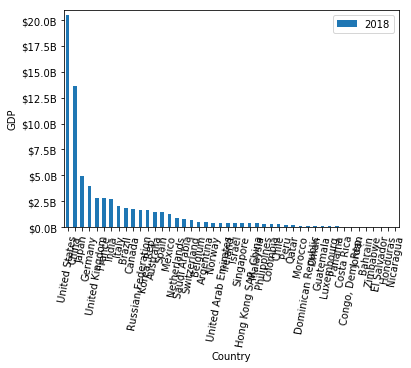

In [45]:
ax = df18gdp.plot(kind='bar', rot = 80)

# Set y scale
ax.set_ylim((0, 21000000000000))

# Set x-axis label
ax.set_xlabel('Country')
ax.set_xticks
# Set y-axis label
ax.set_ylabel("GDP")
ax.set_yticks


def billions(x,pos):
    return '$%1.1fB' % (x * 1e-12)


formatter = FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter)

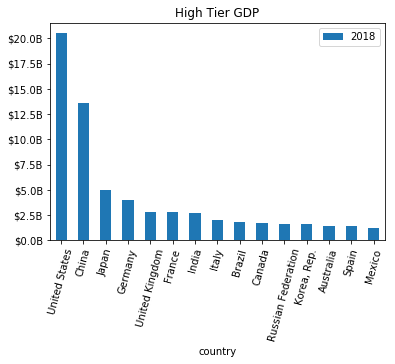

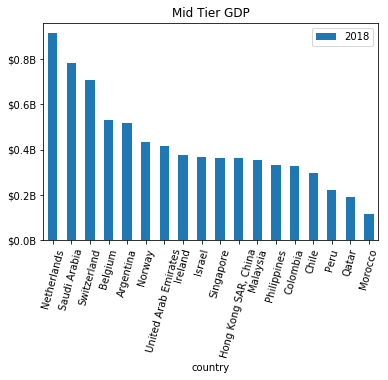

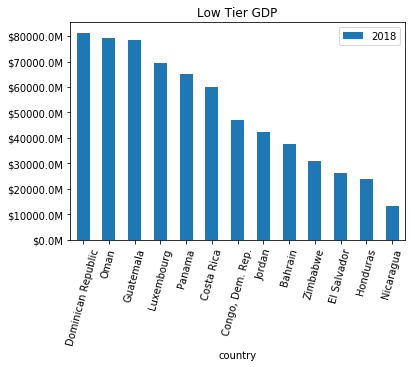

In [46]:
def billions(x,pos):
    return '$%1.1fB' % (x * 1e-12)

Bformatter = FuncFormatter(billions)

def millions(x,pos):
    return '$%1.1fM' % (x * 1e-6)

Mformatter = FuncFormatter(millions)


TopGdp = df18gdp['United States' : 'Mexico']
top_gdp_plot = TopGdp.plot(kind= 'bar', rot = 75)
top_gdp_plot.yaxis.set_major_formatter(Bformatter)
top_gdp_plot.set_title('High Tier GDP')
top_gdp_plot


MidGdp = df18gdp['Netherlands' : 'Morocco']
mid_gdp_plot = MidGdp.plot(kind= 'bar', rot = 75)
mid_gdp_plot.yaxis.set_major_formatter(Bformatter)
mid_gdp_plot.set_title('Mid Tier GDP')
mid_gdp_plot


LowGdp = df18gdp['Dominican Republic' : ]
low_gdp_plot = LowGdp.plot(kind= 'bar', rot = 75)
low_gdp_plot.yaxis.set_major_formatter(Mformatter)
low_gdp_plot.set_title('Low Tier GDP')
low_gdp_plot

# Three Year Comparison Plotly Over Time Practice

In [47]:
df3gdp = df.drop(columns=['1994', '1995', '1996', '1997', '1998', 
             '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2010', '2011', 
             '2012', '2013', '2014', '2015', '2016', '2017'])

df3gdp = df3gdp[df3gdp.series=='GDP (current US$)']
df3gdp = df3gdp.drop(columns = 'series')
df3gdp = df3gdp.set_index('country')
df3gdp = df3gdp.drop(index = ['World', 'Low income', 'Middle income', 'High income'])
df3gdp = df3gdp.sort_values('country', ascending=True)
df3gdp = df3gdp.reset_index()
df3gdp

country                  2001                  2009  \
0              Argentina    268,696,750,000.00    332,976,484,577.62   
1              Australia    378,376,086,723.19    927,805,183,330.88   
2                Bahrain      8,976,207,712.77     22,938,218,085.11   
3                Belgium    237,841,968,680.09    484,552,792,442.34   
4                 Brazil    559,372,276,081.97  1,667,019,783,585.08   
5                 Canada    736,379,777,892.56  1,371,153,004,986.44   
6                  Chile     70,979,923,960.37    172,389,498,444.62   
7                  China  1,339,395,718,865.30  5,101,702,432,883.45   
8               Colombia     98,211,749,595.54    232,494,134,119.68   
9       Congo, Dem. Rep.      7,438,189,100.33     18,648,373,312.39   
10            Costa Rica     15,913,363,440.51     30,562,363,429.76   
11    Dominican Republic     25,599,311,449.38     48,376,555,305.69   
12           El Salvador     12,282,533,600.00     17,601,616,000.00   
13                France  1,376,465,324,384.79  2,690,222,283,967.77   
14               Germany  1,950,648,769,574.94  3,418,005,001,389.27   
15             Guatemala     18,702,802,789.30     37,734,072,278.38   
16              Honduras      7,565,877,533.54     14,486,137,413.55   
17  Hong Kong SAR, China    169,403,241,524.34    214,046,415,026.19   
18                 India    485,441,026,156.55  1,341,886,699,393.18   
19               Ireland    109,135,253,959.73    236,316,405,946.10   
20                Israel    130,671,332,049.36    207,451,779,086.03   
21                 Italy  1,162,317,852,348.99  2,185,160,183,384.27   
22                 Japan  4,303,544,259,842.72  5,231,382,674,593.70   
23                Jordan      8,975,689,844.85     23,974,612,129.76   
24           Korea, Rep.    533,052,076,313.53    901,934,953,364.71   
25            Luxembourg     21,272,418,791.95     51,370,543,206.45   
26              Malaysia     92,783,947,368.42    202,257,586,267.56   
27                Mexico    756,706,300,589.79    900,045,350,649.35   
28               Morocco     39,459,581,217.38     92,897,320,375.82   
29           Netherlands    431,213,422,818.79    868,077,243,678.80   
30             Nicaragua      5,323,146,565.70      8,298,695,144.92   
31                Norway    174,003,247,439.30    386,622,457,579.95   
32                  Oman     19,452,015,604.68     48,388,296,488.95   
33                Panama     12,502,013,400.00     27,116,635,600.00   
34                  Peru     52,030,158,775.41    120,822,986,521.48   
35           Philippines     76,262,072,467.38    168,334,601,260.08   
36                 Qatar     17,538,461,538.46     97,798,351,648.35   
37    Russian Federation    306,602,070,620.50  1,222,644,282,200.48   
38          Saudi Arabia    184,137,469,733.33    429,097,866,666.67   
39             Singapore     89,794,943,349.89    194,152,286,008.94   
40                 Spain    625,975,838,926.18  1,499,099,749,930.54   
41           Switzerland    278,631,271,391.33    541,506,500,413.57   
42  United Arab Emirates    103,311,640,571.82    253,547,358,747.45   
43        United Kingdom  1,625,799,625,737.73  2,394,785,792,179.47   
44         United States 10,581,821,399,000.00 14,448,933,025,000.00   
45              Zimbabwe      6,777,384,700.00      9,665,793,300.00   

                    2018  
0     518,475,134,084.36  
1   1,432,195,178,668.32  
2      37,746,196,808.51  
3     531,766,935,070.73  
4   1,868,626,087,908.48  
5   1,709,327,324,240.04  
6     298,231,139,609.45  
7  13,608,151,864,637.90  
8     330,227,866,233.32  
9      47,227,535,290.94  
10     60,126,014,828.60  
11     81,298,585,403.30  
12     26,056,950,000.00  
13  2,777,535,239,277.98  
14  3,996,759,291,057.81  
15     78,460,447,919.99  
16     23,803,230,472.64  
17    362,992,536,837.41  
18  2,726,322,616,821.31  
19    375,902,683,115.57  
20    369,690,434,708.80  
21  2,073,901,988,878.23  
22  4,970,9

# Missing Values (by Years) Overview

In [48]:
df_mv = df_overview.reset_index()
df_mv = df_mv.pivot_table(index = ['country'], columns = 'series', values='Missing_Values')
df_mv = df_mv.reset_index()

In [49]:
df_mv = df_mv.set_index('country')

In [50]:
df_mv.head()

series     Agricultural raw materials exports (% of merchandise exports)  \
country                                                                    
Argentina                                                  0               
Australia                                                  0               
Bahrain                                                    5               
Belgium                                                    0               
Brazil                                                     1               

series     Agricultural raw materials imports (% of merchandise imports)  \
country                                                                    
Argentina                                                  0               
Australia                                                  0               
Bahrain                                                    5               
Belgium                                                    0               
Brazil                                                     1               

series     Average time to clear exports through customs (days)  \
country                                                           
Argentina                                                 22      
Australia                                                 25      
Bahrain                                                   25      
Belgium                                                   25      
Brazil                                                    24      

series     Bribery incidence (% of firms experiencing at least one bribe payment request)  \
country                                                                                     
Argentina                                                 22                                
Australia                                                 25                                
Bahrain                                                   25                                
Belgium                                                   25                                
Brazil                                                    24                                

series     Changes in inventories (current US$)  \
country                                           
Argentina                                     0   
Australia                                     0   
Bahrain                                       1   
Belgium                                       0   
Brazil                                        0   

series     Commercial service exports (current US$)  \
country                                               
Argentina                                         0   
Australia                                         0   
Bahrain                                           1   
Belgium                                           8   
Brazil                                            0   

series     Commercial service imports (current US$)  \
country                                               
Argentina                                         0   
Australia                                         0   
Bahrain                                           1   
Belgium                                           8   
Brazil                                            0   

series     Computer, communications and other services (% of commercial service exports)  \
country                                                                                    
Argentina                                                  0                               
Australia                                                  0                               
Bahrain                                                    1                               
Belgium                                                    8                               
Brazil                                                     0                               

series     Computer, communications a

In [51]:
#df_mv.reindex(df_mv.mean().sort_values(ascending = False).index, axis=1 )
#Did not work because it got rid of country labels

In [52]:
rows_index=df_mv.mean(axis=1).sort_values(ascending=False).index
col_index=df_mv.mean().sort_values(ascending=False).index
dfmv=df_mv.loc[rows_index,col_index]

In [53]:
dfmv.head(100)
#Shows the number of years missing the value for that given series, for the given country
#For series wherein almost all the countries are missing over 20 years of data... these should not be included.

series                Presence of peace keepers (number of troops, police, and military observers in mandate)  \
country                                                                                                         
Low income                                                           25                                         
United Arab Emirates                                                 25                                         
Qatar                                                                25                                         
Congo, Dem. Rep.                                                     16                                         
Middle income                                                        25                                         
Bahrain                                                              25                                         
Zimbabwe                                                             25                                         
China                                                                25                                         
World                                                                25                                         
Oman                                                                 25                                         
High income                                                          25                                         
Saudi Arabia                                                         25                                         
United States                                                        25                                         
Japan                                                                25                                         
Luxembourg                                                           25                                         
Israel                                                               25                                         
Nicaragua                                                            25                                         
Dominican Republic                                                   25                                         
Russian Federation                                                   25                                         
Honduras                                                             25                                         
Belgium                                                              25                                         
Canada                                                               25                                         
Ireland                                                              25                                         
Hong Kong SAR, China                                                 25                                         
Jordan                                                               25                                         
Switzerland                                                          25                                         
India                                                                25                                         
Morocco                                                              25                                         
Australia                                                            25                                         
Norway                                                               25                                         
Brazil                                                               25                                         
El Salvador                                                          25                                         
Panama                                                               25                                         
Italy                                        

In [54]:
#Drop first 10 columns because they are missing roughly all the years of data for that series
dfmv.drop(dfmv.iloc[:, 0:10], inplace = True, axis = 1)

In [55]:
dfmv.head(100)

series                Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high)  \
country                                                                                                                 
Low income                                                           20                                                 
United Arab Emirates                                                 20                                                 
Qatar                                                                20                                                 
Congo, Dem. Rep.                                                     21                                                 
Middle income                                                        20                                                 
Bahrain                                                              20                                                 
Zimbabwe                                                             21                                                 
China                                                                20                                                 
World                                                                20                                                 
Oman                                                                 20                                                 
High income                                                          20                                                 
Saudi Arabia                                                         20                                                 
United States                                                        20                                                 
Japan                                                                20                                                 
Luxembourg                                                           20                                                 
Israel                                                               21                                                 
Nicaragua                                                            21                                                 
Dominican Republic                                                   20                                                 
Russian Federation                                                   20                                                 
Honduras                                                             20                                                 
Belgium                                                              20                                                 
Canada                                                               20                                                 
Ireland                                                              20                                                 
Hong Kong SAR, China                                                 20                                                 
Jordan                                                               20                                                 
Switzerland                                                          20                                                 
India                                                                20                                                 
Morocco                                                              22                                                 
Australia                                                            20                                                 
Norway                                                               20                                                 
Brazil                                                               20                                                 
El Salv

# Stacked Data for Visibility and Formatting Flexibility

In [56]:
#df_stack = df1.set_index(['series', 'country'])
#df_stack

#df_stack_all = df_stack.loc[['GDP (current US$)', 'GNI (current US$)']]
df_stack_all = df_stack

dfsa = df_stack_all.reset_index()
#dfs = dfs.drop(columns = 'index')
dfsa = dfsa.pivot_table(index = ['country', 'year'], columns = 'series', values='value')
dfsa = dfsa.reset_index()
#Run reset index after pivoting!
#Still need to sort by year o ascending/descending values?
dfsa.head(40)

series    country  year  \
0       Argentina  1994   
1       Argentina  1995   
2       Argentina  1996   
3       Argentina  1997   
4       Argentina  1998   
5       Argentina  1999   
6       Argentina  2000   
7       Argentina  2001   
8       Argentina  2002   
9       Argentina  2003   
10      Argentina  2004   
11      Argentina  2005   
12      Argentina  2006   
13      Argentina  2007   
14      Argentina  2008   
15      Argentina  2009   
16      Argentina  2010   
17      Argentina  2011   
18      Argentina  2012   
19      Argentina  2013   
20      Argentina  2014   
21      Argentina  2015   
22      Argentina  2016   
23      Argentina  2017   
24      Argentina  2018   
25      Australia  1994   
26      Australia  1995   
27      Australia  1996   
28      Australia  1997   
29      Australia  1998   
30      Australia  1999   
31      Australia  2000   
32      Australia  2001   
33      Australia  2002   
34      Australia  2003   
35      Australia  2004   
36      Australia  2005   
37      Australia  2006   
38      Australia  2007   
39      Australia  2008   

series  Agricultural raw materials exports (% of merchandise exports)  \
0                                                    3.36               
1                                                    4.32               
2                                                    3.81               
3                                                    2.84               
4                                                    2.11               
5                                                    2.10               
6                                                    1.73               
7                                                    1.62               
8                                                    1.56               
9                                                    1.52               
10                                                   1.64               
11                                                   1.37               
12                                                   1.29               
13                                                   1.25               
14                                                   0.98               
15                                                   1.08               
16                                                   1.23               
17                                                   1.28               
18                                                   0.95               
19                                                   0.93               
20                                                   1.07               
21                                                   1.03               
22                                                   1.10               
23                                                   1.15               
24                                                   0.99               
25                                                   8.85               
26                                                   8.34               
27                                                   7.49               
28                                                   8.06               
29                                                   7.00               
30                                                   6.34               
31                                                   5.65               
32                                                   5.90               
33                                                   5.36               
34                                                   4.54               
35                                                   4.31               
36                                                   3.45               
37                                                   3.06               
38                                           

#Was needed before we removed these earlier on in df1
#dfsa = dfsa.set_index('country')
#dfsa = dfsa.drop(index = ['World', 'Low income', 'Middle income', 'High income'])
#dfsa = dfsa.reset_index()

In [57]:
dfsa.head(100)

series    country  year  \
0       Argentina  1994   
1       Argentina  1995   
2       Argentina  1996   
3       Argentina  1997   
4       Argentina  1998   
5       Argentina  1999   
6       Argentina  2000   
7       Argentina  2001   
8       Argentina  2002   
9       Argentina  2003   
10      Argentina  2004   
11      Argentina  2005   
12      Argentina  2006   
13      Argentina  2007   
14      Argentina  2008   
15      Argentina  2009   
16      Argentina  2010   
17      Argentina  2011   
18      Argentina  2012   
19      Argentina  2013   
20      Argentina  2014   
21      Argentina  2015   
22      Argentina  2016   
23      Argentina  2017   
24      Argentina  2018   
25      Australia  1994   
26      Australia  1995   
27      Australia  1996   
28      Australia  1997   
29      Australia  1998   
..            ...   ...   
70        Bahrain  2014   
71        Bahrain  2015   
72        Bahrain  2016   
73        Bahrain  2017   
74        Bahrain  2018   
75        Belgium  1994   
76        Belgium  1995   
77        Belgium  1996   
78        Belgium  1997   
79        Belgium  1998   
80        Belgium  1999   
81        Belgium  2000   
82        Belgium  2001   
83        Belgium  2002   
84        Belgium  2003   
85        Belgium  2004   
86        Belgium  2005   
87        Belgium  2006   
88        Belgium  2007   
89        Belgium  2008   
90        Belgium  2009   
91        Belgium  2010   
92        Belgium  2011   
93        Belgium  2012   
94        Belgium  2013   
95        Belgium  2014   
96        Belgium  2015   
97        Belgium  2016   
98        Belgium  2017   
99        Belgium  2018   

series  Agricultural raw materials exports (% of merchandise exports)  \
0                                                    3.36               
1                                                    4.32               
2                                                    3.81               
3                                                    2.84               
4                                                    2.11               
5                                                    2.10               
6                                                    1.73               
7                                                    1.62               
8                                                    1.56               
9                                                    1.52               
10                                                   1.64               
11                                                   1.37               
12                                                   1.29               
13                                                   1.25               
14                                                   0.98               
15                                                   1.08               
16                                                   1.23               
17                                                   1.28               
18                                                   0.95               
19                                                   0.93               
20                                                   1.07               
21                                                   1.03               
22                                                   1.10               
23                                                   1.15               
24                                                   0.99               
25                                                   8.85               
26                                                   8.34               
27                                                   7.49               
28                                                   8.06               
29                                                   7.00               
..                                                    ...     

In [58]:
#Drop columns with certain number of NaN
dfsa = dfsa.dropna(thresh=len(dfsa) - 1000, axis=1)

In [59]:
dfsa.head(100)

series    country  year  \
0       Argentina  1994   
1       Argentina  1995   
2       Argentina  1996   
3       Argentina  1997   
4       Argentina  1998   
5       Argentina  1999   
6       Argentina  2000   
7       Argentina  2001   
8       Argentina  2002   
9       Argentina  2003   
10      Argentina  2004   
11      Argentina  2005   
12      Argentina  2006   
13      Argentina  2007   
14      Argentina  2008   
15      Argentina  2009   
16      Argentina  2010   
17      Argentina  2011   
18      Argentina  2012   
19      Argentina  2013   
20      Argentina  2014   
21      Argentina  2015   
22      Argentina  2016   
23      Argentina  2017   
24      Argentina  2018   
25      Australia  1994   
26      Australia  1995   
27      Australia  1996   
28      Australia  1997   
29      Australia  1998   
..            ...   ...   
70        Bahrain  2014   
71        Bahrain  2015   
72        Bahrain  2016   
73        Bahrain  2017   
74        Bahrain  2018   
75        Belgium  1994   
76        Belgium  1995   
77        Belgium  1996   
78        Belgium  1997   
79        Belgium  1998   
80        Belgium  1999   
81        Belgium  2000   
82        Belgium  2001   
83        Belgium  2002   
84        Belgium  2003   
85        Belgium  2004   
86        Belgium  2005   
87        Belgium  2006   
88        Belgium  2007   
89        Belgium  2008   
90        Belgium  2009   
91        Belgium  2010   
92        Belgium  2011   
93        Belgium  2012   
94        Belgium  2013   
95        Belgium  2014   
96        Belgium  2015   
97        Belgium  2016   
98        Belgium  2017   
99        Belgium  2018   

series  Agricultural raw materials exports (% of merchandise exports)  \
0                                                    3.36               
1                                                    4.32               
2                                                    3.81               
3                                                    2.84               
4                                                    2.11               
5                                                    2.10               
6                                                    1.73               
7                                                    1.62               
8                                                    1.56               
9                                                    1.52               
10                                                   1.64               
11                                                   1.37               
12                                                   1.29               
13                                                   1.25               
14                                                   0.98               
15                                                   1.08               
16                                                   1.23               
17                                                   1.28               
18                                                   0.95               
19                                                   0.93               
20                                                   1.07               
21                                                   1.03               
22                                                   1.10               
23                                                   1.15               
24                                                   0.99               
25                                                   8.85               
26                                                   8.34               
27                                                   7.49               
28                                                   8.06               
29                                                   7.00               
..                                                    ...     

### Call out individually

dfsa = dfsa.drop(columns = ['New business density (new registrations per 1,000 people ages 15-64)',
'New businesses registered (number)',
'Investment in energy with private participation (current US$)',
'Technicians in R&D (per million people)',
'Public private partnerships investment in energy (current US$)',
'Time to export, documentary compliance (hours)',
'Time to import, border compliance (hours)',
'Time to export, border compliance (hours)',
'Cost to import, border compliance (US$)',
'Cost to import, documentary compliance (US$)',
'Cost to export, documentary compliance (US$)',
'Cost to export, border compliance (US$)',
'Time to import, documentary compliance (hours)',
'Logistics performance index: Competence and quality of logistics services (1=low to 5=high)',
'Logistics performance index: Overall (1=low to 5=high)',
'Logistics performance index: Frequency with which shipments reach consignee within scheduled or expected time (1=low to 5=high)',
'Logistics performance index: Efficiency of customs clearance process (1=low to 5=high)',
'Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high)',
'Logistics performance index: Ability to track and trace consignments (1=low to 5=high)',
'Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high)',
'Lead time to export, median case (days)',
'Lead time to import, median case (days)',
'Average time to clear exports through customs (days)',
'Bribery incidence (% of firms experiencing at least one bribe payment request)',
'Ease of doing business index (1=most business-friendly regulations)',
'Firms that spend on R&D (% of firms)',
'Public private partnerships investment in ICT (current US$)',
'Presence of peace keepers (number of troops, police, and military observers in mandate)'])

In [60]:
pd.set_option('display.max_rows', 1000)

In [61]:
series_totals_sorted

0
series                                                  
GDP per capita (current US$)                           0
GDP (current US$)                                      0
GNI (current US$)                                      6
GDP per capita growth (annual %)                       7
GDP growth (annual %)                                  7
GNI, Atlas method (current US$)                       14
GNI per capita, Atlas method (current US$)            14
Trade (% of GDP)                                      18
Imports of goods and services (% of GDP)              18
Exports of goods and services (% of GDP)              18
Exports of goods and services (current US$)           37
Imports of goods and services (current US$)           37
Gross capital formation (current US$)                 43
Industry (including construction), value added ...    59
Manufacturing, value added (current US$)              83
Manufacturing, value added (% of GDP)                 85
Imports of goods and services (annual % growth)       94
GNI per capita growth (annual %)                     103
GNI growth (annual %)                                103
Exports of goods and services (annual % growth)      104
Manufactures imports (% of merchandise imports)      106
Agricultural raw materials imports (% of mercha...   106
External balance on goods and services (current...   112
Manufactures exports (% of merchandise exports)      113
Ores and metals exports (% of merchandise exports)   113
Agricultural raw materials exports (% of mercha...   114
Commercial service exports (current US$)             114
Commercial service imports (current US$)             116
Computer, communications and other services (% ...   117
Computer, communications and other services (% ...   132
High-technology exports (% of manufactured expo...   132
High-technology exports (current US$)                148
Export value index (2000 = 100)                      163
Import value index (2000 = 100)                      163
Manufacturing, value added (annual % growth)         164
Changes in inventories (current US$)                 194
Tariff rate, applied, simple mean, all products...   220
Tariff rate, most favored nation, weighted mean...   220
Gross value added at basic prices (GVA) (curren...   248
Start-up procedures to register a business (num...   531
Cost of business start-up procedures (% of GNI ...   531
Time required to start a business (days)             531
Research and development expenditure (% of GDP)      534
Procedures to register property (number)             571
Time required to build a warehouse (days)            611
Profit tax (% of commercial profits)                 611
Procedures to build a warehouse (number)             611
Researchers in R&D (per million people)              683
New business density (new registrations per 1,0...   826
New businesses registered (number)                   834
Investment in energy with private participation...   877
Technicians in R&D (per million people)              877
Public private partnerships investment in energ...   940
Time to export, documentary compliance (hours)      1000
Time to import, border compliance (hours)           1000
Time to export, border compliance (hours)           1000
Cost to import, border compliance (US$)             1000
Cost to import, documentary compliance (US$)        1000
Cost to export, documentary compliance (US$)        1000
Cost to export, border compliance (US$)             1000
Time to import, documentary compliance (hours)      1000
Logistics performance index: Competence and qua...  1006
Logistics performance index: Overall (1=low to ...  1006
Logistics performance index: Frequency with whi...  1006
Logistics performance index: Efficiency of cust...  1006
Logistics performance index: Ease of arranging ...  1006
Logistics performance index: Ability to track a...  1006
Logistics performance index: Quality of trade a...  1006
Lead time to export, median case (days)             1026
Lead tim

# 2014 Isolation

MCMC and Linear Interpolation

In [62]:
#Least missing values is year 2014
dfsa14 = dfsa[dfsa['year'] == '2014']
dfsa14 = dfsa14.drop(columns = ['year'])
dfsa14.set_index('country', inplace = True)
dfsa14.head(100)

series                Agricultural raw materials exports (% of merchandise exports)  \
country                                                                               
Argentina                                                          1.07               
Australia                                                          2.58               
Bahrain                                                            0.03               
Belgium                                                            1.39               
Brazil                                                             4.01               
Canada                                                             4.29               
Chile                                                              6.32               
China                                                              0.45               
Colombia                                                           2.87               
Congo, Dem. Rep.                                                    nan               
Costa Rica                                                         2.19               
Dominican Republic                                                 0.80               
El Salvador                                                        0.88               
France                                                             0.95               
Germany                                                            0.78               
Guatemala                                                          2.99               
Honduras                                                           1.25               
Hong Kong SAR, China                                               2.56               
India                                                              1.57               
Ireland                                                            0.67               
Israel                                                             0.58               
Italy                                                              0.67               
Japan                                                              0.86               
Jordan                                                             0.28               
Korea, Rep.                                                        0.92               
Luxembourg                                                         2.01               
Malaysia                                                           1.75               
Mexico                                                             0.33               
Morocco                                                            0.89               
Netherlands                                                        2.98               
Nicaragua                                                          0.96               
Norway                                                             0.68               
Oman                                                               0.02               
Panama                                                             0.03               
Peru                                                               1.42               
Philippines                                                        1.04               
Qatar                                                              0.00               
Russian Federation                                                 1.82               
Saudi Arabia                                                       0.02               
Singapore                                                          0.32               
Spain                                                              1.08               
Switzerland                                                        0.25               
United Arab Emirates                                               0.07               
United Kingdom                                                     0.69              

In [63]:
dfsa14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Argentina to Zimbabwe
Data columns (total 70 columns):
Agricultural raw materials exports (% of merchandise exports)                                                                      45 non-null float64
Agricultural raw materials imports (% of merchandise imports)                                                                      45 non-null float64
Changes in inventories (current US$)                                                                                               43 non-null float64
Commercial service exports (current US$)                                                                                           45 non-null float64
Commercial service imports (current US$)                                                                                           45 non-null float64
Computer, communications and other services (% of commercial service exports)                                                      45

In [64]:
#locate columns that are missing a certain percentage of the data and consider how/if these should be imputed

In [65]:
dfsa14 = dfsa14.reset_index()

In [66]:
dfsa14_missing = dfsa14.isnull().sum() * 100 / len(dfsa14)

In [67]:
dfsa14_missing.head(50)

series
country                                                                                                                            0.00
Agricultural raw materials exports (% of merchandise exports)                                                                      2.17
Agricultural raw materials imports (% of merchandise imports)                                                                      2.17
Changes in inventories (current US$)                                                                                               6.52
Commercial service exports (current US$)                                                                                           2.17
Commercial service imports (current US$)                                                                                           2.17
Computer, communications and other services (% of commercial service exports)                                                      2.17
Computer, communications and other servic

#locate columns where the number of nan values are greater than or equal to 25% of that column for all 'series'
dfsa14.loc[dfsa14['series'] == nan >= 25% ]

if count(nan) in 'series' is > (.25 * (count(x)))
    return loc[x]

In [68]:
dfsa14.head()

series    country  \
0       Argentina   
1       Australia   
2         Bahrain   
3         Belgium   
4          Brazil   

series  Agricultural raw materials exports (% of merchandise exports)  \
0                                                    1.07               
1                                                    2.58               
2                                                    0.03               
3                                                    1.39               
4                                                    4.01               

series  Agricultural raw materials imports (% of merchandise imports)  \
0                                                    0.89               
1                                                    0.68               
2                                                    1.04               
3                                                    1.27               
4                                                    0.99               

series  Changes in inventories (current US$)  \
0                           6,752,296,832.26   
1                          -2,035,251,996.70   
2                             414,893,617.02   
3                           1,714,139,993.32   
4                          16,587,335,316.62   

series  Commercial service exports (current US$)  \
0                              13,189,837,804.76   
1                              55,610,991,575.62   
2                               8,571,276,595.74   
3                             123,026,103,755.97   
4                              39,046,701,888.60   

series  Commercial service imports (current US$)  \
0                              17,628,881,981.13   
1                              66,749,264,533.55   
2                               6,764,414,893.62   
3                             117,578,947,480.15   
4                              85,915,546,867.55   

series  Computer, communications and other services (% of commercial service exports)  \
0                                                   43.11                               
1                                                   22.60                               
2                                                   25.26                               
3                                                   59.37                               
4                                                   62.78                               

series  Computer, communications and other services (% of commercial service imports)  \
0                                                   37.89                               
1                                                   28.32                               
2                                                   15.41                               
3                                                   52.46                               
4                                                   50.47                               

series  Cost of business start-up procedures (% of GNI per capita)  \
0                                                   17.70            
1                                                    0.70            
2                                                    0.80            
3                                                    5.20            
4                                                    5.50            

series  Cost to export, border compliance (US$)  ...  \
0                                        150.00  ...   
1                                        749.00  ...   
2                                         47.00  ...   
3                                          0.00  ...   
4                                        862.00  ...   

series  Tariff rate, applied, simple mean, all products (%)  \
0                                                   12.58     
1                                                    2.84     
2                                                    3.75     


In [69]:
dfsa14.isnull().sum(axis=1)

0      2
1      5
2      5
3      3
4      1
5      4
6      4
7      7
8      1
9     14
10     1
11     6
12     6
13     2
14     2
15     2
16     7
17     2
18     5
19     4
20     7
21     3
22     3
23     3
24     2
25     2
26     3
27     2
28    10
29     3
30     4
31     3
32     5
33     6
34     2
35     8
36     7
37     0
38     6
39     2
40     2
41     5
42     9
43     2
44     5
45     9
dtype: int64

dfsa14.dropna(axis= 1, thresh= (.75 * dfsa14.apply(lambda x: x.count(), axis=0), inplace = True)

#What my initial thought process was, but Lambda takes too long/isnt computationally efficient

In [70]:
pd.reset_option('display.max_rows')

In [71]:
dfsa14.head(100)

series               country  \
0                  Argentina   
1                  Australia   
2                    Bahrain   
3                    Belgium   
4                     Brazil   
5                     Canada   
6                      Chile   
7                      China   
8                   Colombia   
9           Congo, Dem. Rep.   
10                Costa Rica   
11        Dominican Republic   
12               El Salvador   
13                    France   
14                   Germany   
15                 Guatemala   
16                  Honduras   
17      Hong Kong SAR, China   
18                     India   
19                   Ireland   
20                    Israel   
21                     Italy   
22                     Japan   
23                    Jordan   
24               Korea, Rep.   
25                Luxembourg   
26                  Malaysia   
27                    Mexico   
28                   Morocco   
29               Netherlands   
30                 Nicaragua   
31                    Norway   
32                      Oman   
33                    Panama   
34                      Peru   
35               Philippines   
36                     Qatar   
37        Russian Federation   
38              Saudi Arabia   
39                 Singapore   
40                     Spain   
41               Switzerland   
42      United Arab Emirates   
43            United Kingdom   
44             United States   
45                  Zimbabwe   

series  Agricultural raw materials exports (% of merchandise exports)  \
0                                                    1.07               
1                                                    2.58               
2                                                    0.03               
3                                                    1.39               
4                                                    4.01               
5                                                    4.29               
6                                                    6.32               
7                                                    0.45               
8                                                    2.87               
9                                                     nan               
10                                                   2.19               
11                                                   0.80               
12                                                   0.88               
13                                                   0.95               
14                                                   0.78               
15                                                   2.99               
16                                                   1.25               
17                                                   2.56               
18                                                   1.57               
19                                                   0.67               
20                                                   0.58               
21                                                   0.67               
22                                                   0.86               
23                                                   0.28               
24                                                   0.92               
25                                                   2.01               
26                                                   1.75               
27                                                   0.33               
28                                                   0.89               
29                                                   2.98               
30                                                   0.96               
31                                                   0.68               
32                                                   0.02               
33           

# Imputing Data Practice on 2014 Using SimpleImputer

In [72]:
#Linear Interpolation, KNN for each category at a time, and Multiple Imputation

In [73]:
dfsa14.set_index('country', inplace = True)
DF = dfsa14.copy()
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(DF))
imputed_DF.columns = DF.columns
imputed_DF.index = DF.index
#Imputes the mean for the series at 2014, not for the country over the years...
#Because this is just for 2014, we will press on with these values, even though they are wildly innacurate.

In [74]:
imputed_DF.head(100)

series                Agricultural raw materials exports (% of merchandise exports)  \
country                                                                               
Argentina                                                          1.07               
Australia                                                          2.58               
Bahrain                                                            0.03               
Belgium                                                            1.39               
Brazil                                                             4.01               
Canada                                                             4.29               
Chile                                                              6.32               
China                                                              0.45               
Colombia                                                           2.87               
Congo, Dem. Rep.                                                   0.95               
Costa Rica                                                         2.19               
Dominican Republic                                                 0.80               
El Salvador                                                        0.88               
France                                                             0.95               
Germany                                                            0.78               
Guatemala                                                          2.99               
Honduras                                                           1.25               
Hong Kong SAR, China                                               2.56               
India                                                              1.57               
Ireland                                                            0.67               
Israel                                                             0.58               
Italy                                                              0.67               
Japan                                                              0.86               
Jordan                                                             0.28               
Korea, Rep.                                                        0.92               
Luxembourg                                                         2.01               
Malaysia                                                           1.75               
Mexico                                                             0.33               
Morocco                                                            0.89               
Netherlands                                                        2.98               
Nicaragua                                                          0.96               
Norway                                                             0.68               
Oman                                                               0.02               
Panama                                                             0.03               
Peru                                                               1.42               
Philippines                                                        1.04               
Qatar                                                              0.00               
Russian Federation                                                 1.82               
Saudi Arabia                                                       0.02               
Singapore                                                          0.32               
Spain                                                              1.08               
Switzerland                                                        0.25               
United Arab Emirates                                               0.07               
United Kingdom                                                     0.69              

In [75]:
DF.head(100)

series                Agricultural raw materials exports (% of merchandise exports)  \
country                                                                               
Argentina                                                          1.07               
Australia                                                          2.58               
Bahrain                                                            0.03               
Belgium                                                            1.39               
Brazil                                                             4.01               
Canada                                                             4.29               
Chile                                                              6.32               
China                                                              0.45               
Colombia                                                           2.87               
Congo, Dem. Rep.                                                    nan               
Costa Rica                                                         2.19               
Dominican Republic                                                 0.80               
El Salvador                                                        0.88               
France                                                             0.95               
Germany                                                            0.78               
Guatemala                                                          2.99               
Honduras                                                           1.25               
Hong Kong SAR, China                                               2.56               
India                                                              1.57               
Ireland                                                            0.67               
Israel                                                             0.58               
Italy                                                              0.67               
Japan                                                              0.86               
Jordan                                                             0.28               
Korea, Rep.                                                        0.92               
Luxembourg                                                         2.01               
Malaysia                                                           1.75               
Mexico                                                             0.33               
Morocco                                                            0.89               
Netherlands                                                        2.98               
Nicaragua                                                          0.96               
Norway                                                             0.68               
Oman                                                               0.02               
Panama                                                             0.03               
Peru                                                               1.42               
Philippines                                                        1.04               
Qatar                                                              0.00               
Russian Federation                                                 1.82               
Saudi Arabia                                                       0.02               
Singapore                                                          0.32               
Spain                                                              1.08               
Switzerland                                                        0.25               
United Arab Emirates                                               0.07               
United Kingdom                                                     0.69              

# Full Data Imputation Across Time series

## MICE Impute Loop

In [76]:
# Sample DF
#Russia has no dragons (dragons are all NaN)
#USA is missing most of its dragon info but not all
#There is a general increasing trend for everything
sample_data = [['USA', 'gdp', 2001, 10],
               ['USA', 'avgIQ', 2001, 100],
               ['USA', 'people', 2001, 1000],
               ['USA', 'dragons', 2001, 3],
               ['CHN', 'gdp', 2001, 12],
               ['CHN', 'avgIQ', 2001, 120],
               ['CHN', 'people', 2001, 2000],
               ['CHN', 'dragons', 2001, 1],
               ['RUS', 'gdp', 2001, 11],
               ['RUS', 'avgIQ', 2001, 105],
               ['RUS', 'people', 2001, 1500],
               ['RUS', 'dragons', 2001, np.nan],
               
               ['USA', 'gdp', 2002, 12],
               ['USA', 'avgIQ', 2002, 105],
               ['USA', 'people', 2002, 1200],
               ['USA', 'dragons', 2002, np.nan],
               ['CHN', 'gdp', 2002, 14],
               ['CHN', 'avgIQ', 2002, 127],
               ['CHN', 'people', 2002, 3100],
               ['CHN', 'dragons', 2002, 4],
               ['RUS', 'gdp', 2002, 11],
               ['RUS', 'avgIQ', 2002, 99],
               ['RUS', 'people', 2002, 1600],
               ['RUS', 'dragons', 2002, np.nan],
               
               ['USA', 'gdp', 2003, 15],
               ['USA', 'avgIQ', 2003, 115],
               ['USA', 'people', 2003, 2000],
               ['USA', 'dragons', 2003, np.nan],
               ['CHN', 'gdp', 2003, 16],
               ['CHN', 'avgIQ', 2003, 132],
               ['CHN', 'people', 2003, 4000],
               ['CHN', 'dragons', 2003, 6],
               ['RUS', 'gdp', 2003, 11],
               ['RUS', 'avgIQ', 2003, 108],
               ['RUS', 'people', 2003, 2000],
               ['RUS', 'dragons', 2003, np.nan],
               
               ['USA', 'gdp', 2004, 18],
               ['USA', 'avgIQ', 2004, 111],
               ['USA', 'people', 2004, 2500],
               ['USA', 'dragons', 2004, np.nan],
               ['CHN', 'gdp', 2004, 18],
               ['CHN', 'avgIQ', 2004, 140],
               ['CHN', 'people', 2004, np.nan],
               ['CHN', 'dragons', 2004, np.nan],
               ['RUS', 'gdp', 2004, 15],
               ['RUS', 'avgIQ', 2004, 103],
               ['RUS', 'people', 2004, 2800],
               ['RUS', 'dragons', 2004, 3],
               
               ['USA', 'gdp', 2005, 23],
               ['USA', 'avgIQ', 2005, 111],
               ['USA', 'people', 2005, 3700],
               ['USA', 'dragons', 2005, 8],
               ['CHN', 'gdp', 2005, 22],
               ['CHN', 'avgIQ', 2005, 143],
               ['CHN', 'people', 2005, 6000],
               ['CHN', 'dragons', 2005, 15],
               ['RUS', 'gdp', 2005, 17],
               ['RUS', 'avgIQ', 2005, np.nan],
               ['RUS', 'people', 2005, 3000],
               ['RUS', 'dragons', 2005, np.nan]]

sample_df = pd.DataFrame(sample_data, columns = ['A','B','C','D'])
#make float so that the MICE works later on...
sample_df['C'] = sample_df['C'].astype(float)
sample_df.head()

A        B        C        D
0  USA      gdp 2,001.00    10.00
1  USA    avgIQ 2,001.00   100.00
2  USA   people 2,001.00 1,000.00
3  USA  dragons 2,001.00     3.00
4  CHN      gdp 2,001.00    12.00

In [77]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
A    60 non-null object
B    60 non-null object
C    60 non-null float64
D    50 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [78]:
sample_group = sample_df.groupby(['A', 'B'])

In [79]:
sample_group.groups

{('CHN', 'avgIQ'): Int64Index([5, 17, 29, 41, 53], dtype='int64'),
 ('CHN', 'dragons'): Int64Index([7, 19, 31, 43, 55], dtype='int64'),
 ('CHN', 'gdp'): Int64Index([4, 16, 28, 40, 52], dtype='int64'),
 ('CHN', 'people'): Int64Index([6, 18, 30, 42, 54], dtype='int64'),
 ('RUS', 'avgIQ'): Int64Index([9, 21, 33, 45, 57], dtype='int64'),
 ('RUS', 'dragons'): Int64Index([11, 23, 35, 47, 59], dtype='int64'),
 ('RUS', 'gdp'): Int64Index([8, 20, 32, 44, 56], dtype='int64'),
 ('RUS', 'people'): Int64Index([10, 22, 34, 46, 58], dtype='int64'),
 ('USA', 'avgIQ'): Int64Index([1, 13, 25, 37, 49], dtype='int64'),
 ('USA', 'dragons'): Int64Index([3, 15, 27, 39, 51], dtype='int64'),
 ('USA', 'gdp'): Int64Index([0, 12, 24, 36, 48], dtype='int64'),
 ('USA', 'people'): Int64Index([2, 14, 26, 38, 50], dtype='int64')}

In [80]:
#sample_group['D'].isnull().values.any() == True
sample_group['D'].apply(lambda x: x.isnull().values.any() == True).any()

True

In [81]:
sample_group.groups.keys()

dict_keys([('CHN', 'avgIQ'), ('CHN', 'dragons'), ('CHN', 'gdp'), ('CHN', 'people'), ('RUS', 'avgIQ'), ('RUS', 'dragons'), ('RUS', 'gdp'), ('RUS', 'people'), ('USA', 'avgIQ'), ('USA', 'dragons'), ('USA', 'gdp'), ('USA', 'people')])

# Imputation Loop

In [82]:
from impyute.imputation.cs import mice

In [83]:
#Current Imputation Loop on Sample Data

sample_group = sample_df.groupby(['A', 'B'])
d = pd.DataFrame([])

for group_index, group in sample_group:

        if group.isnull().values.any() == True:
            group['D'] = ((mice(group.apply({'C': lambda x: x.values, 'D': lambda y: y.values})))[1]).values
            d = d.append(pd.DataFrame({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values}))
                
        else:
            d = d.append(pd.DataFrame({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values}))
            continue

d = d.reset_index()
d = d.drop(columns = ['index'])
d['C'] = d['C'].astype(int)
d.head(100)

/Users/alexmannos/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/alexmannos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/alexmannos/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/alexmannos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

A        B     C        D
0   CHN    avgIQ  2001   120.00
1   CHN    avgIQ  2002   127.00
2   CHN    avgIQ  2003   132.00
3   CHN    avgIQ  2004   140.00
4   CHN    avgIQ  2005   143.00
5   CHN  dragons  2001     1.00
6   CHN  dragons  2002     4.00
7   CHN  dragons  2003     6.00
8   CHN  dragons  2004    10.86
9   CHN  dragons  2005    15.00
10  CHN      gdp  2001    12.00
11  CHN      gdp  2002    14.00
12  CHN      gdp  2003    16.00
13  CHN      gdp  2004    18.00
14  CHN      gdp  2005    22.00
15  CHN   people  2001 2,000.00
16  CHN   people  2002 3,100.00
17  CHN   people  2003 4,000.00
18  CHN   people  2004 5,014.29
19  CHN   people  2005 6,000.00
20  RUS    avgIQ  2001   105.00
21  RUS    avgIQ  2002    99.00
22  RUS    avgIQ  2003   108.00
23  RUS    avgIQ  2004   103.00
24  RUS    avgIQ  2005   104.50
25  RUS  dragons  2001     3.00
26  RUS  dragons  2002     3.00
27  RUS  dragons  2003     3.00
28  RUS  dragons  2004     3.00
29  RUS  dragons  2005     3.00
30  RUS      gdp  2001    11.00
31  RUS      gdp  2002    11.00
32  RUS      gdp  2003    11.00
33  RUS      gdp  2004    15.00
34  RUS      gdp  2005    17.00
35  RUS   people  2001 1,500.00
36  RUS   people  2002 1,600.00
37  RUS   people  2003 2,000.00
38  RUS   people  2004 2,800.00
39  RUS   people  2005 3,000.00
40  USA    avgIQ  2001   100.00
41  USA    avgIQ  2002   105.00
42  USA    avgIQ  2003   115.00
43  USA    avgIQ  2004   111.00
44  USA    avgIQ  2005   111.00
45  USA  dragons  2001     3.00
46  USA  dragons  2002     4.25
47  USA  dragons  2003     5.50
48  USA  dragons  2004     6.75
49  USA  dragons  2005     8.00
50  USA      gdp  2001    10.00
51  USA      gdp  2002    12.00
52  USA      gdp  2003    15.00
53  USA      gdp  2004    18.00
54  USA      gdp  2005    23.00
55  USA   people  2001 1,000.00
56  USA   people  2002 1,200.00
57  USA   people  2003 2,000.00
58  USA   people  2004 2,500.00
59  USA   people  2005 3,700.00

### This (putting values into dictionary) could be faster
sample_group = sample_df.groupby(['A', 'B'])
d = []

for group_index, group in sample_group:

        if group.isnull().values.any() == True:
            group['D'] = ((mice(group.apply({'C': lambda x: x.values, 'D': lambda y: y.values})))[1]).values 
            d.append({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values})
        else: 
            d.append({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values})    
            continue
d = pd.DataFrame(d)
d.head(10)

### See Groups

sample_group = sample_df.groupby(['A', 'B'])

for group_index, group in sample_group:

    if group.isnull().values.any() == True:       
        group['D'] = ((mice(group.apply({'C': lambda x: x.values, 'D': lambda y: y.values})))[1]).values
        print(group)
    else:        
        print(group)
        continue
        

### Loop Practice
for group_index, group in sample_group:

    if 12 in group.values:
    
        print(group)
    else:
        #continue
        print('Checked group but could not satisfy condition', group_index)

for group_index, group in sample_group:

        #Each group is a tuple
    if 'USA' in group_index:
    
        print(group)
    else:
        continue
        #print('not working')

In [84]:
s_group1 = sample_group.get_group(('USA', 'dragons'))
s_group1.head()

A        B        C    D
3   USA  dragons 2,001.00 3.00
15  USA  dragons 2,002.00  nan
27  USA  dragons 2,003.00  nan
39  USA  dragons 2,004.00  nan
51  USA  dragons 2,005.00 8.00

In [85]:
s_group1.values

array([['USA', 'dragons', 2001.0, 3.0],
       ['USA', 'dragons', 2002.0, nan],
       ['USA', 'dragons', 2003.0, nan],
       ['USA', 'dragons', 2004.0, nan],
       ['USA', 'dragons', 2005.0, 8.0]], dtype=object)

In [86]:
s_group1['D'].isnull().values.any() == True

True

In [87]:
s_group1.apply({'C': lambda x: x.values, 'D': lambda y: y.values})
#s_group1.apply({'D': lambda x: x.values}) 

C    D
0 2,001.00 3.00
1 2,002.00  nan
2 2,003.00  nan
3 2,004.00  nan
4 2,005.00 8.00

In [88]:
d.head()

A      B     C      D
0  CHN  avgIQ  2001 120.00
1  CHN  avgIQ  2002 127.00
2  CHN  avgIQ  2003 132.00
3  CHN  avgIQ  2004 140.00
4  CHN  avgIQ  2005 143.00

In [89]:
dd = d.to_dict()

In [90]:
dd

{'A': {0: 'CHN',
  1: 'CHN',
  2: 'CHN',
  3: 'CHN',
  4: 'CHN',
  5: 'CHN',
  6: 'CHN',
  7: 'CHN',
  8: 'CHN',
  9: 'CHN',
  10: 'CHN',
  11: 'CHN',
  12: 'CHN',
  13: 'CHN',
  14: 'CHN',
  15: 'CHN',
  16: 'CHN',
  17: 'CHN',
  18: 'CHN',
  19: 'CHN',
  20: 'RUS',
  21: 'RUS',
  22: 'RUS',
  23: 'RUS',
  24: 'RUS',
  25: 'RUS',
  26: 'RUS',
  27: 'RUS',
  28: 'RUS',
  29: 'RUS',
  30: 'RUS',
  31: 'RUS',
  32: 'RUS',
  33: 'RUS',
  34: 'RUS',
  35: 'RUS',
  36: 'RUS',
  37: 'RUS',
  38: 'RUS',
  39: 'RUS',
  40: 'USA',
  41: 'USA',
  42: 'USA',
  43: 'USA',
  44: 'USA',
  45: 'USA',
  46: 'USA',
  47: 'USA',
  48: 'USA',
  49: 'USA',
  50: 'USA',
  51: 'USA',
  52: 'USA',
  53: 'USA',
  54: 'USA',
  55: 'USA',
  56: 'USA',
  57: 'USA',
  58: 'USA',
  59: 'USA'},
 'B': {0: 'avgIQ',
  1: 'avgIQ',
  2: 'avgIQ',
  3: 'avgIQ',
  4: 'avgIQ',
  5: 'dragons',
  6: 'dragons',
  7: 'dragons',
  8: 'dragons',
  9: 'dragons',
  10: 'gdp',
  11: 'gdp',
  12: 'gdp',
  13: 'gdp',
  14: 'gdp',
  15

In [91]:
#Plot of original data

x_axis = d['C'].values
y_axis = d['D'].values
colors = d['A'].values
subplots = d['B'].values



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cf8bd30>,
      dtype=object)

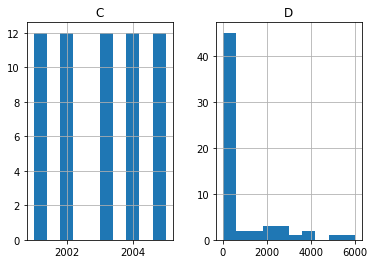

In [92]:
d.hist()

In [93]:
s = d.copy()
s = s.pivot_table(index = ['A', 'C'], columns = 'B', values= 'D')

In [94]:
ss = s.reset_index()
ss

B     A     C  avgIQ  dragons   gdp   people
0   CHN  2001 120.00     1.00 12.00 2,000.00
1   CHN  2002 127.00     4.00 14.00 3,100.00
2   CHN  2003 132.00     6.00 16.00 4,000.00
3   CHN  2004 140.00    10.86 18.00 5,014.29
4   CHN  2005 143.00    15.00 22.00 6,000.00
5   RUS  2001 105.00     3.00 11.00 1,500.00
6   RUS  2002  99.00     3.00 11.00 1,600.00
7   RUS  2003 108.00     3.00 11.00 2,000.00
8   RUS  2004 103.00     3.00 15.00 2,800.00
9   RUS  2005 104.50     3.00 17.00 3,000.00
10  USA  2001 100.00     3.00 10.00 1,000.00
11  USA  2002 105.00     4.25 12.00 1,200.00
12  USA  2003 115.00     5.50 15.00 2,000.00
13  USA  2004 111.00     6.75 18.00 2,500.00
14  USA  2005 111.00     8.00 23.00 3,700.00

In [95]:
s.head(100)

B         avgIQ  dragons   gdp   people
A   C                                  
CHN 2001 120.00     1.00 12.00 2,000.00
    2002 127.00     4.00 14.00 3,100.00
    2003 132.00     6.00 16.00 4,000.00
    2004 140.00    10.86 18.00 5,014.29
    2005 143.00    15.00 22.00 6,000.00
RUS 2001 105.00     3.00 11.00 1,500.00
    2002  99.00     3.00 11.00 1,600.00
    2003 108.00     3.00 11.00 2,000.00
    2004 103.00     3.00 15.00 2,800.00
    2005 104.50     3.00 17.00 3,000.00
USA 2001 100.00     3.00 10.00 1,000.00
    2002 105.00     4.25 12.00 1,200.00
    2003 115.00     5.50 15.00 2,000.00
    2004 111.00     6.75 18.00 2,500.00
    2005 111.00     8.00 23.00 3,700.00

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f688710>,
      dtype=object)

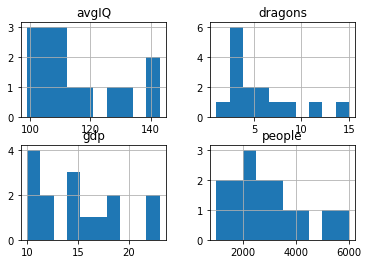

In [96]:
s.hist()

In [97]:
ss.head()

B    A     C  avgIQ  dragons   gdp   people
0  CHN  2001 120.00     1.00 12.00 2,000.00
1  CHN  2002 127.00     4.00 14.00 3,100.00
2  CHN  2003 132.00     6.00 16.00 4,000.00
3  CHN  2004 140.00    10.86 18.00 5,014.29
4  CHN  2005 143.00    15.00 22.00 6,000.00

B    A     C  avgIQ  dragons   gdp   people
0  CHN  2001 120.00     1.00 12.00 2,000.00
1  CHN  2002 127.00     4.00 14.00 3,100.00
2  CHN  2003 132.00     6.00 16.00 4,000.00
3  CHN  2004 140.00    10.86 18.00 5,014.29
4  CHN  2005 143.00    15.00 22.00 6,000.00
B    A     C  avgIQ  dragons   gdp   people
5  RUS  2001 105.00     3.00 11.00 1,500.00
6  RUS  2002  99.00     3.00 11.00 1,600.00
7  RUS  2003 108.00     3.00 11.00 2,000.00
8  RUS  2004 103.00     3.00 15.00 2,800.00
9  RUS  2005 104.50     3.00 17.00 3,000.00
B     A     C  avgIQ  dragons   gdp   people
10  USA  2001 100.00     3.00 10.00 1,000.00
11  USA  2002 105.00     4.25 12.00 1,200.00
12  USA  2003 115.00     5.50 15.00 2,000.00
13  USA  2004 111.00     6.75 18.00 2,500.00
14  USA  2005 111.00     8.00 23.00 3,700.00


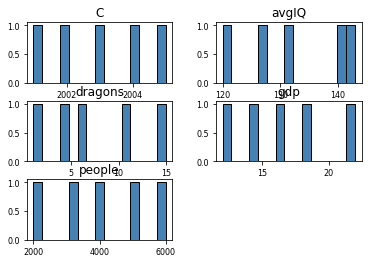

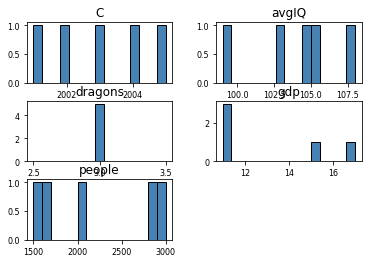

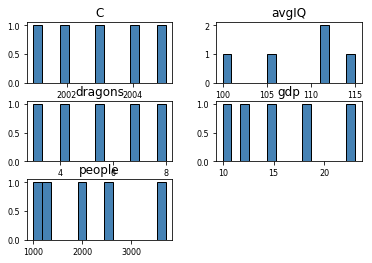

In [98]:
grouped_s = ss.groupby(['A'])

for _, group in grouped_s:
    
    print(group)
    
    #group.hist()
    group.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)


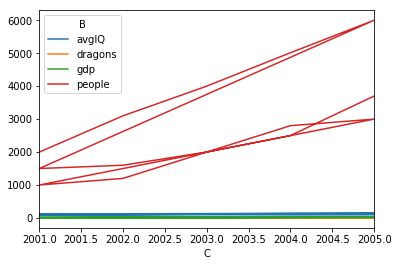

In [99]:
ss.plot(x = 'C')

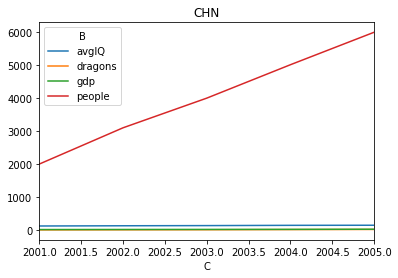

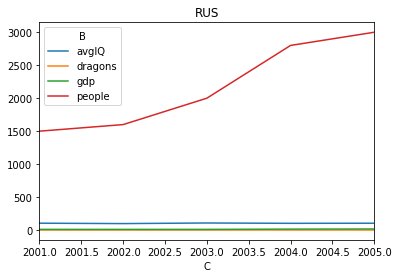

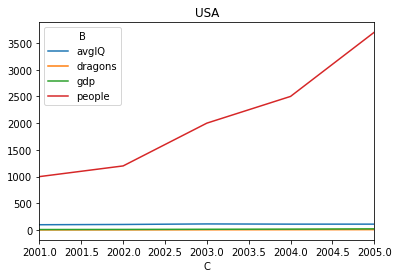

In [100]:
grouped_s = ss.groupby(['A'])

for _, group in grouped_s:
    
    group.plot(x = 'C', title = _)

numpy.ndarray

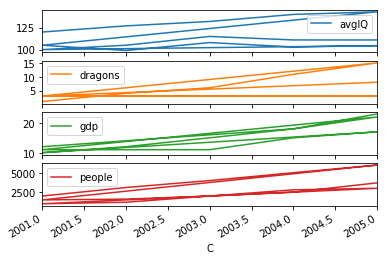

In [101]:
ss_subs = ss.plot.line(x = 'C', subplots = 'A')
type(ss_subs)

numpy.ndarray

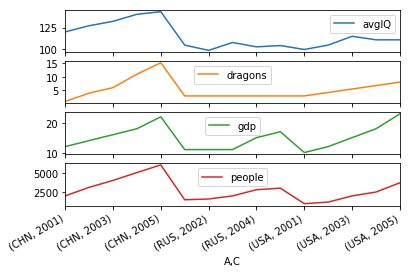

In [102]:
axes = s.plot.line(subplots=True)
type(axes)

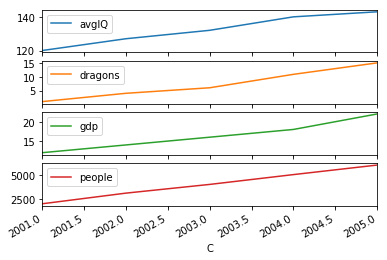

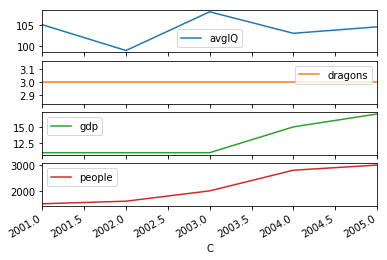

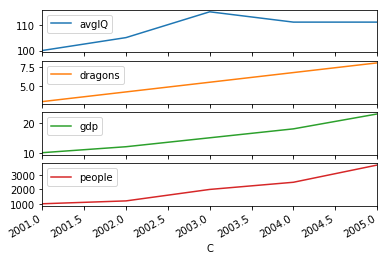

In [103]:
grouped_s = ss.groupby(['A'])

for _, group in grouped_s:

    group.plot.line(x = 'C', subplots=True)
    type(group)

In [104]:
s.head()

B         avgIQ  dragons   gdp   people
A   C                                  
CHN 2001 120.00     1.00 12.00 2,000.00
    2002 127.00     4.00 14.00 3,100.00
    2003 132.00     6.00 16.00 4,000.00
    2004 140.00    10.86 18.00 5,014.29
    2005 143.00    15.00 22.00 6,000.00

In [105]:
#Scaling

sa = s.values #returns a numpy array, can also use to_numpy
min_max_scaler = preprocessing.MinMaxScaler()
sa_scaled = min_max_scaler.fit_transform(sa)
s2 = pd.DataFrame(sa_scaled, columns = s.columns, index = s.index)
s2.head(20)

B         avgIQ  dragons  gdp  people
A   C                                
CHN 2001   0.48     0.00 0.15    0.20
    2002   0.64     0.21 0.31    0.42
    2003   0.75     0.36 0.46    0.60
    2004   0.93     0.70 0.62    0.80
    2005   1.00     1.00 0.92    1.00
RUS 2001   0.14     0.14 0.08    0.10
    2002   0.00     0.14 0.08    0.12
    2003   0.20     0.14 0.08    0.20
    2004   0.09     0.14 0.38    0.36
    2005   0.12     0.14 0.54    0.40
USA 2001   0.02     0.14 0.00    0.00
    2002   0.14     0.23 0.15    0.04
    2003   0.36     0.32 0.38    0.20
    2004   0.27     0.41 0.62    0.30
    2005   0.27     0.50 1.00    0.54

In [106]:
s_df = pd.DataFrame(s.values)
s_df
#Note that column 0 at 13 and 14 are the same so this is inplace

0     1     2        3
0  120.00  1.00 12.00 2,000.00
1  127.00  4.00 14.00 3,100.00
2  132.00  6.00 16.00 4,000.00
3  140.00 10.86 18.00 5,014.29
4  143.00 15.00 22.00 6,000.00
5  105.00  3.00 11.00 1,500.00
6   99.00  3.00 11.00 1,600.00
7  108.00  3.00 11.00 2,000.00
8  103.00  3.00 15.00 2,800.00
9  104.50  3.00 17.00 3,000.00
10 100.00  3.00 10.00 1,000.00
11 105.00  4.25 12.00 1,200.00
12 115.00  5.50 15.00 2,000.00
13 111.00  6.75 18.00 2,500.00
14 111.00  8.00 23.00 3,700.00

In [107]:
#Plot scaled values



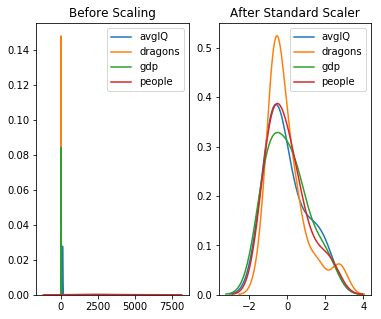

avgIQ  dragons   gdp  people
0   0.37    -1.21 -0.77   -0.55
1   0.87    -0.36 -0.26    0.25
2   1.23     0.20  0.26    0.90
3   1.81     1.57  0.77    1.64
4   2.03     2.74  1.80    2.35

In [108]:

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(s)

scaled_df = pd.DataFrame(scaled_df, columns = ['avgIQ','dragons','gdp','people'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(s['avgIQ'], ax=ax1)
sns.kdeplot(s['dragons'], ax=ax1)
sns.kdeplot(s['gdp'], ax=ax1)
sns.kdeplot(s['people'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['avgIQ'], ax=ax2)
sns.kdeplot(scaled_df['dragons'], ax=ax2)
sns.kdeplot(scaled_df['gdp'], ax=ax2)
sns.kdeplot(scaled_df['people'], ax=ax2)

plt.show()
scaled_df.head()



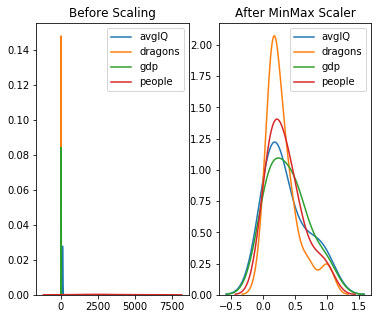

avgIQ  dragons  gdp  people
0   0.48     0.00 0.15    0.20
1   0.64     0.21 0.31    0.42
2   0.75     0.36 0.46    0.60
3   0.93     0.70 0.62    0.80
4   1.00     1.00 0.92    1.00

In [109]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(s)
scaled_df = pd.DataFrame(scaled_df, columns = ['avgIQ','dragons','gdp','people'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(s['avgIQ'], ax=ax1)
sns.kdeplot(s['dragons'], ax=ax1)
sns.kdeplot(s['gdp'], ax=ax1)
sns.kdeplot(s['people'], ax=ax1)

ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_df['avgIQ'], ax=ax2)
sns.kdeplot(scaled_df['dragons'], ax=ax2)
sns.kdeplot(scaled_df['gdp'], ax=ax2)
sns.kdeplot(scaled_df['people'], ax=ax2)

plt.show()
scaled_df.head()

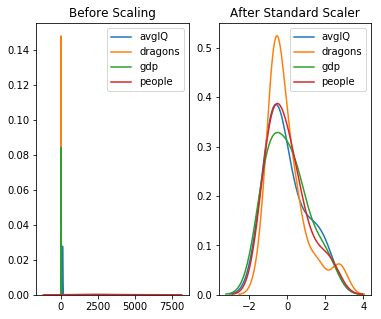

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35

In [110]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(s)
scaled_df = pd.DataFrame(scaled_df, columns = s.columns, index = s.index)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(s['avgIQ'], ax=ax1)
sns.kdeplot(s['dragons'], ax=ax1)
sns.kdeplot(s['gdp'], ax=ax1)
sns.kdeplot(s['people'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['avgIQ'], ax=ax2)
sns.kdeplot(scaled_df['dragons'], ax=ax2)
sns.kdeplot(scaled_df['gdp'], ax=ax2)
sns.kdeplot(scaled_df['people'], ax=ax2)

plt.show()
scaled_df.head()



In [111]:
scaled_df

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35
RUS 2001  -0.71    -0.65 -1.03   -0.92
    2002  -1.15    -0.65 -1.03   -0.84
    2003  -0.50    -0.65 -1.03   -0.55
    2004  -0.86    -0.65  0.00    0.03
    2005  -0.75    -0.65  0.51    0.17
USA 2001  -1.07    -0.65 -1.28   -1.28
    2002  -0.71    -0.29 -0.77   -1.13
    2003   0.01     0.06  0.00   -0.55
    2004  -0.28     0.41  0.77   -0.19
    2005  -0.28     0.77  2.05    0.68

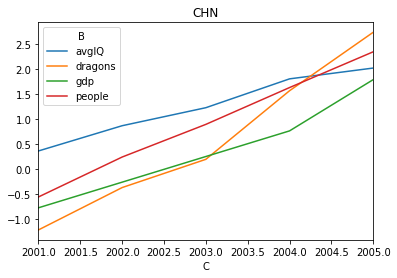

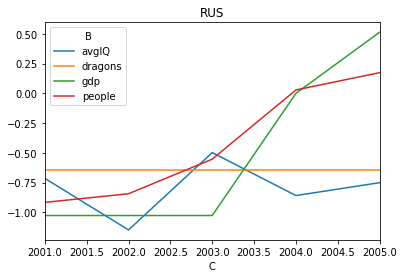

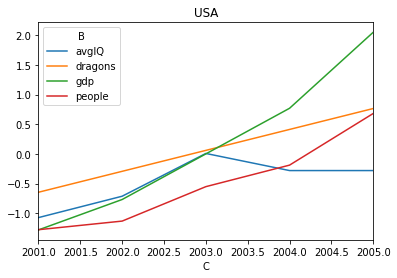

In [112]:
grouped_s = scaled_df.reset_index().groupby(['A'])

for group_name, group in grouped_s:
    
    group.plot(x = 'C', title = group_name)

In [113]:
scaled_df

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35
RUS 2001  -0.71    -0.65 -1.03   -0.92
    2002  -1.15    -0.65 -1.03   -0.84
    2003  -0.50    -0.65 -1.03   -0.55
    2004  -0.86    -0.65  0.00    0.03
    2005  -0.75    -0.65  0.51    0.17
USA 2001  -1.07    -0.65 -1.28   -1.28
    2002  -0.71    -0.29 -0.77   -1.13
    2003   0.01     0.06  0.00   -0.55
    2004  -0.28     0.41  0.77   -0.19
    2005  -0.28     0.77  2.05    0.68

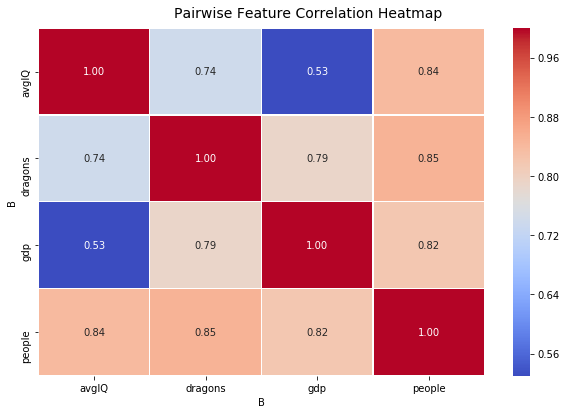

In [114]:

f, ax = plt.subplots(figsize=(10, 6))
corr = scaled_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pairwise Feature Correlation Heatmap', fontsize=14)

In [115]:
scaled_df

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35
RUS 2001  -0.71    -0.65 -1.03   -0.92
    2002  -1.15    -0.65 -1.03   -0.84
    2003  -0.50    -0.65 -1.03   -0.55
    2004  -0.86    -0.65  0.00    0.03
    2005  -0.75    -0.65  0.51    0.17
USA 2001  -1.07    -0.65 -1.28   -1.28
    2002  -0.71    -0.29 -0.77   -1.13
    2003   0.01     0.06  0.00   -0.55
    2004  -0.28     0.41  0.77   -0.19
    2005  -0.28     0.77  2.05    0.68

In [116]:
# total pca.explained_variance_ratio should be above 85%

pca = PCA(.95)
pca.fit(scaled_df)
pca.n_components_
print(pca.explained_variance_ratio_)
pca.transform(scaled_df)


[0.82313391 0.11774398 0.04392776]


array([[-1.11123527, -0.87960395,  0.62610641],
       [ 0.2340706 , -0.86155587,  0.45467909],
       [ 1.28862355, -0.75923787,  0.44724959],
       [ 2.90406472, -0.73344199, -0.18056533],
       [ 4.47949515, -0.11879039, -0.52618489],
       [-1.64861597, -0.18490086, -0.25397801],
       [-1.81418745,  0.12376403, -0.30000442],
       [-1.35242015, -0.36618147, -0.08754912],
       [-0.72236509,  0.55115893,  0.417313  ],
       [-0.34869235,  0.81058542,  0.66566089],
       [-2.1354241 , -0.07290721, -0.53352651],
       [-1.46125257,  0.04117027, -0.54334785],
       [-0.26147109,  0.03835443, -0.2475451 ],
       [ 0.34503383,  0.78188824, -0.19820705],
       [ 1.6043762 ,  1.6296983 ,  0.25989928]])

pca = PCA(.95)
principalComponenets = pca.fit_transform(scaled_df)


In [117]:
#Number of components used that keep 95%
pca.n_components_

3

In [118]:
print(pca.explained_variance_ratio_)

[0.82313391 0.11774398 0.04392776]


In [119]:
pca.transform(scaled_df)

array([[-1.11123527, -0.87960395,  0.62610641],
       [ 0.2340706 , -0.86155587,  0.45467909],
       [ 1.28862355, -0.75923787,  0.44724959],
       [ 2.90406472, -0.73344199, -0.18056533],
       [ 4.47949515, -0.11879039, -0.52618489],
       [-1.64861597, -0.18490086, -0.25397801],
       [-1.81418745,  0.12376403, -0.30000442],
       [-1.35242015, -0.36618147, -0.08754912],
       [-0.72236509,  0.55115893,  0.417313  ],
       [-0.34869235,  0.81058542,  0.66566089],
       [-2.1354241 , -0.07290721, -0.53352651],
       [-1.46125257,  0.04117027, -0.54334785],
       [-0.26147109,  0.03835443, -0.2475451 ],
       [ 0.34503383,  0.78188824, -0.19820705],
       [ 1.6043762 ,  1.6296983 ,  0.25989928]])

In [120]:
#Note the 15 entries. Same amount of indeces as before
pca_df = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca_df, columns = ['pc1','pc2','pc3'])
#pc3 only gives .04 so it really is not worth keeping
pca_df = pca_df.drop(columns = 'pc3')
pca_df.head(20)

pc1   pc2
0  -1.11 -0.88
1   0.23 -0.86
2   1.29 -0.76
3   2.90 -0.73
4   4.48 -0.12
5  -1.65 -0.18
6  -1.81  0.12
7  -1.35 -0.37
8  -0.72  0.55
9  -0.35  0.81
10 -2.14 -0.07
11 -1.46  0.04
12 -0.26  0.04
13  0.35  0.78
14  1.60  1.63

In [121]:
principalComponents = pca_df.to_numpy()
principalComponents

array([[-1.11123527, -0.87960395],
       [ 0.2340706 , -0.86155587],
       [ 1.28862355, -0.75923787],
       [ 2.90406472, -0.73344199],
       [ 4.47949515, -0.11879039],
       [-1.64861597, -0.18490086],
       [-1.81418745,  0.12376403],
       [-1.35242015, -0.36618147],
       [-0.72236509,  0.55115893],
       [-0.34869235,  0.81058542],
       [-2.1354241 , -0.07290721],
       [-1.46125257,  0.04117027],
       [-0.26147109,  0.03835443],
       [ 0.34503383,  0.78188824],
       [ 1.6043762 ,  1.6296983 ]])

In [122]:
finalDf = pd.concat([pca_df, scaled_df.reset_index()[['A']]], axis = 1)
finalDf

pc1   pc2    A
0  -1.11 -0.88  CHN
1   0.23 -0.86  CHN
2   1.29 -0.76  CHN
3   2.90 -0.73  CHN
4   4.48 -0.12  CHN
5  -1.65 -0.18  RUS
6  -1.81  0.12  RUS
7  -1.35 -0.37  RUS
8  -0.72  0.55  RUS
9  -0.35  0.81  RUS
10 -2.14 -0.07  USA
11 -1.46  0.04  USA
12 -0.26  0.04  USA
13  0.35  0.78  USA
14  1.60  1.63  USA

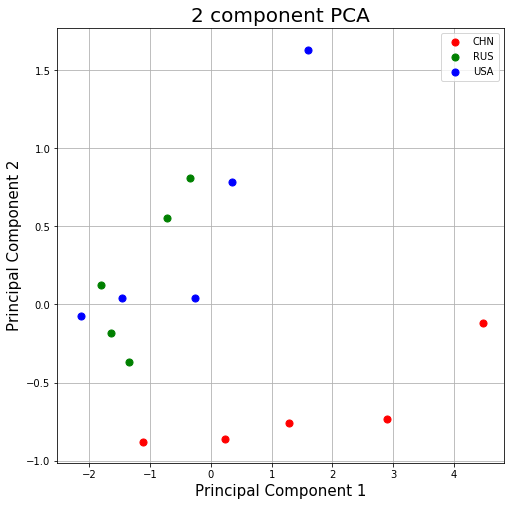

In [123]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['CHN', 'RUS', 'USA']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['A'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

#iris = datasets.load_iris()
#X = iris.data

#y = iris.target
y = finalDf.A

# In general, it's a good idea to scale the data prior to PCA.
#scaler = StandardScaler()
#scaler.fit(X)
#X=scaler.transform(X)    
#pca = PCA()
#x_new = pca.fit_transform(X)

x_new = principalComponents

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
#myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
myplot(x_new, np.transpose(pca.components_))
plt.show()

In [ ]:
biDF = s.reset_index().drop(columns= ['C'])

cols = list(biDF.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('A')) #Remove b from list
biDF = biDF[cols+['A']] #Create new dataframe with columns in the order you want
biDF


#iris = datasets.load_iris()
X = biDF
y = biDF.A
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [125]:
#Use instead of .values
scaled_df.to_numpy()

array([[ 0.36786287, -1.21218764, -0.76948376, -0.55263306],
       [ 0.87277269, -0.36459806, -0.25649459,  0.2462295 ],
       [ 1.23342256,  0.20046166,  0.25649459,  0.89984431],
       [ 1.81046235,  1.57274956,  0.76948376,  1.63645784],
       [ 2.02685227,  2.74323041,  1.79546212,  2.35232168],
       [-0.71408674, -0.64712792, -1.02597835, -0.9157524 ],
       [-1.14686659, -0.64712792, -1.02597835, -0.84312853],
       [-0.49769682, -0.64712792, -1.02597835, -0.55263306],
       [-0.85834669, -0.64712792,  0.        ,  0.02835789],
       [-0.75015173, -0.64712792,  0.51298918,  0.17360563],
       [-1.07473661, -0.64712792, -1.28247294, -1.27887174],
       [-0.71408674, -0.29396559, -0.76948376, -1.133624  ],
       [ 0.007213  ,  0.05919673,  0.        , -0.55263306],
       [-0.2813069 ,  0.41235906,  0.76948376, -0.18951371],
       [-0.2813069 ,  0.76552138,  2.0519567 ,  0.68197271]])

# Adding the more comprehensive LPI dataset to this one (Combining Data)

In [126]:
#Combine this with the LPI dataset to show that we are able to do that

In [127]:
LPI_Data = pd.read_csv("Logistics_Performance_Index.csv", na_values = '..')

In [128]:
LPIdata = pd.DataFrame(LPI_Data)

In [129]:
LPIdata.head(10)

Country Name Country Code  \
0    Argentina          ARG   
1    Argentina          ARG   
2    Argentina          ARG   
3    Argentina          ARG   
4    Argentina          ARG   
5    Argentina          ARG   
6    Argentina          ARG   
7    Argentina          ARG   
8    Argentina          ARG   
9    Argentina          ARG   

                                         Series Name     Series Code  \
0  Ability to track and trace consignments, rank ...  LP.LPI.TRAC.RK   
1  Ability to track and trace consignments, score...  LP.LPI.TRAC.XQ   
2  Competence and quality of logistics services, ...  LP.LPI.LOGS.RK   
3  Competence and quality of logistics services, ...  LP.LPI.LOGS.XQ   
4  Ease of arranging competitively priced interna...  LP.LPI.ITRN.RK   
5  Ease of arranging competitively priced interna...  LP.LPI.ITRN.XQ   
6  Efficiency of the clearance process, rank (1=h...  LP.LPI.CUST.RK   
7  Efficiency of the clearance process, score (1=...  LP.LPI.CUST.XQ   
8  Frequency with which shipments reach consignee...  LP.LPI.TIME.RK   
9  Frequency with which shipments reach consignee...  LP.LPI.TIME.XQ   

   2007 [YR2007]  2010 [YR2010]  2012 [YR2012]  2014 [YR2014]  2016 [YR2016]  \
0          46.00          51.00          38.00          53.00          47.00   
1           3.00           3.15           3.30           3.15           3.26   
2          44.00          45.00          51.00          62.00          66.00   
3           3.00           3.03           2.95           2.93           2.83   
4          49.00          43.00          32.00          64.00          81.00   
5           2.97           3.15           3.33           2.96           2.76   
6          51.00          56.00          83.00          85.00          76.00   
7           2.65           2.63           2.45           2.55           2.63   
8          46.00          43.00          72.00          55.00          61.00   
9           3.50           3.82           3.27           3.49           3.47   

   2018 [YR2018]  
0          58.00  
1           3.05  
2          68.00  
3           2.78  
4          59.00  
5           2.92  
6          98.00  
7           2.42  
8          58.00  
9           3.37

In [130]:
LPIdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 10 columns):
Country Name     857 non-null object
Country Code     855 non-null object
Series Name      855 non-null object
Series Code      855 non-null object
2007 [YR2007]    660 non-null float64
2010 [YR2010]    817 non-null float64
2012 [YR2012]    817 non-null float64
2014 [YR2014]    836 non-null float64
2016 [YR2016]    855 non-null float64
2018 [YR2018]    836 non-null float64
dtypes: float64(6), object(4)
memory usage: 67.3+ KB


In [131]:
LPIdata.columns = ['country', 'drop1', 'measure', 'drop2', '2007', '2010', '2012', '2014', '2016', '2018']

In [132]:
LPIdata = LPIdata.drop(columns=['drop1', 'drop2'])

In [133]:
LPIdata.head()

country                                            measure  2007  2010  \
0  Argentina  Ability to track and trace consignments, rank ... 46.00 51.00   
1  Argentina  Ability to track and trace consignments, score...  3.00  3.15   
2  Argentina  Competence and quality of logistics services, ... 44.00 45.00   
3  Argentina  Competence and quality of logistics services, ...  3.00  3.03   
4  Argentina  Ease of arranging competitively priced interna... 49.00 43.00   

   2012  2014  2016  2018  
0 38.00 53.00 47.00 58.00  
1  3.30  3.15  3.26  3.05  
2 51.00 62.00 66.00 68.00  
3  2.95  2.93  2.83  2.78  
4 32.00 64.00 81.00 59.00

In [134]:
#Missing Values
LPIdata.isna().sum().sort_values(ascending = True).to_frame()

0
country    3
measure    5
2016       5
2014      24
2018      24
2010      43
2012      43
2007     200

In [135]:
LPIdata.info

<bound method DataFrame.info of                                                country  \
0                                            Argentina   
1                                            Argentina   
2                                            Argentina   
3                                            Argentina   
4                                            Argentina   
5                                            Argentina   
6                                            Argentina   
7                                            Argentina   
8                                            Argentina   
9                                            Argentina   
10                                           Argentina   
11                                           Argentina   
12                                           Argentina   
13                                           Argentina   
14                                           Argentina   
15                                      

# Imputing on Actual DataFrame

In [136]:
#dfsa had the series with over 1000 missing values removed
#melted that to then pivot, so as to get Years as columns
#Removed the series without at least 3 non-NaN values
#melted back to vertical, so that groupby can work
#Use groupby iteration to impute missing values based on Stdev/Mean

#Concern!!! Might not have the same number of series for each country now...

In [137]:
df2 = pd.melt(dfsa,
                       ["country", 'year'],
                       var_name="series",
                       value_name="value")
#df1 = df1.sort_values(by=["year"], ascending = True)
df2.head(10)

country  year                                             series  value
0  Argentina  1994  Agricultural raw materials exports (% of merch...   3.36
1  Argentina  1995  Agricultural raw materials exports (% of merch...   4.32
2  Argentina  1996  Agricultural raw materials exports (% of merch...   3.81
3  Argentina  1997  Agricultural raw materials exports (% of merch...   2.84
4  Argentina  1998  Agricultural raw materials exports (% of merch...   2.11
5  Argentina  1999  Agricultural raw materials exports (% of merch...   2.10
6  Argentina  2000  Agricultural raw materials exports (% of merch...   1.73
7  Argentina  2001  Agricultural raw materials exports (% of merch...   1.62
8  Argentina  2002  Agricultural raw materials exports (% of merch...   1.56
9  Argentina  2003  Agricultural raw materials exports (% of merch...   1.52

In [138]:
df2 = df2.pivot_table(index = ['country','series'], columns = 'year', values='value')

In [139]:
df2.head(100)

year                                                                       1994  \
country   series                                                                  
Argentina Agricultural raw materials exports (% of mercha...               3.36   
          Agricultural raw materials imports (% of mercha...               1.62   
          Changes in inventories (current US$)                    68,602,700.00   
          Commercial service exports (current US$)             3,180,600,000.00   
          Commercial service imports (current US$)             6,856,100,000.00   
          Computer, communications and other services (% ...              10.34   
          Computer, communications and other services (% ...              15.34   
          Cost of business start-up procedures (% of GNI ...                nan   
          Cost to export, border compliance (US$)                           nan   
          Cost to export, documentary compliance (US$)                      nan   
          Cost to import, border compliance (US$)                           nan   
          Cost to import, documentary compliance (US$)                      nan   
          Export value index (2000 = 100)                                 60.13   
          Exports of goods and services (% of GDP)                         7.53   
          Exports of goods and services (annual % growth)                 15.30   
          Exports of goods and services (current US$)         19,385,100,000.00   
          External balance on goods and services (current...  -7,914,860,000.00   
          GDP (current US$)                                  257,440,000,000.00   
          GDP growth (annual %)                                            5.84   
          GDP per capita (current US$)                                 7,483.14   
          GDP per capita growth (annual %)                                 4.51   
          GNI (current US$)                                  253,743,263,100.00   
          GNI growth (annual %)                                            5.66   
          GNI per capita growth (annual %)                                 4.33   
          GNI per capita, Atlas method (current US$)                   7,620.00   
          GNI, Atlas method (current US$)                    262,188,226,196.83   
          Gross capital formation (current US$)               51,399,500,500.00   
          Gross value added at basic prices (GVA) (curren... 237,306,001,100.00   
          High-technology exports (% of manufactured expo...               4.76   
          High-technology exports (current US$)                  247,037,164.00   
...                                                                         ...   
Australia Agricultural raw materials exports (% of mercha...               8.85   
          Agricultural raw materials imports (% of mercha...               1.80   
          Changes in inventories (current US$)                   989,277,066.76   
          Commercial service exports (current US$)            14,181,809,312.38   
          Commercial service imports (current US$)            15,731,180,933.63   
          Computer, communications and other services (% ...              14.25   
          Computer, communications and other services (% ...              25.71   
          Cost of business start-up procedures (% of GNI ...                nan   
          Cost to export, border compliance (US$)                           nan   
          Cost to export, documentary compliance (US$)                      nan   
          Cost to import, border compliance (US$)                           nan   
          Cost to import, documentary compliance (US$)                      nan   
          Export value index (2000 = 100)                                   nan   
          Exports of goods and services (% of GDP)                        18.01   
          Exports of goods and services (annual % growth)                  9.49   
          Export

#Keep only the rows with at least X non-NaN values
df2.dropna(thresh=3,inplace=True)

#Alternative way to remove entire series where a country has only nan values for that series
a = df2.notna().sum(1).lt(2).loc[lambda x: x].index.get_level_values(1)
df_final = df2.query('ilevel_1 not in @a')

In [142]:
# dataframe.detec_non-nan_values.sum().groupby(index_level).transform_original_df
m = df2.notna().sum(1).groupby(level=1).transform(lambda x: x.ge(1).all())
df_final = df2[m]

In [143]:
df_final = df_final.reset_index()
df3 = pd.melt(df_final,
                       ["country", 'series'],
                       var_name="year",
                       value_name="value")
#df1 = df1.sort_values(by=["year"], ascending = True)
df3.head(10)

country                                             series  year  \
0  Argentina  Agricultural raw materials exports (% of merch...  1994   
1  Argentina  Agricultural raw materials imports (% of merch...  1994   
2  Argentina               Changes in inventories (current US$)  1994   
3  Argentina           Commercial service exports (current US$)  1994   
4  Argentina           Commercial service imports (current US$)  1994   
5  Argentina  Computer, communications and other services (%...  1994   
6  Argentina  Computer, communications and other services (%...  1994   
7  Argentina  Cost of business start-up procedures (% of GNI...  1994   
8  Argentina            Cost to export, border compliance (US$)  1994   
9  Argentina       Cost to export, documentary compliance (US$)  1994   

             value  
0             3.36  
1             1.62  
2    68,602,700.00  
3 3,180,600,000.00  
4 6,856,100,000.00  
5            10.34  
6            15.34  
7              nan  
8              nan  
9              nan

In [144]:
df3.set_index('country')

series  year  \
country                                                              
Argentina  Agricultural raw materials exports (% of merch...  1994   
Argentina  Agricultural raw materials imports (% of merch...  1994   
Argentina               Changes in inventories (current US$)  1994   
Argentina           Commercial service exports (current US$)  1994   
Argentina           Commercial service imports (current US$)  1994   
Argentina  Computer, communications and other services (%...  1994   
Argentina  Computer, communications and other services (%...  1994   
Argentina  Cost of business start-up procedures (% of GNI...  1994   
Argentina            Cost to export, border compliance (US$)  1994   
Argentina       Cost to export, documentary compliance (US$)  1994   
Argentina            Cost to import, border compliance (US$)  1994   
Argentina       Cost to import, documentary compliance (US$)  1994   
Argentina                    Export value index (2000 = 100)  1994   
Argentina           Exports of goods and services (% of GDP)  1994   
Argentina    Exports of goods and services (annual % growth)  1994   
Argentina        Exports of goods and services (current US$)  1994   
Argentina  External balance on goods and services (curren...  1994   
Argentina                                  GDP (current US$)  1994   
Argentina                              GDP growth (annual %)  1994   
Argentina                       GDP per capita (current US$)  1994   
Argentina                   GDP per capita growth (annual %)  1994   
Argentina                                  GNI (current US$)  1994   
Argentina                              GNI growth (annual %)  1994   
Argentina                   GNI per capita growth (annual %)  1994   
Argentina         GNI per capita, Atlas method (current US$)  1994   
Argentina                    GNI, Atlas method (current US$)  1994   
Argentina              Gross capital formation (current US$)  1994   
Argentina  Gross value added at basic prices (GVA) (curre...  1994   
Argentina  High-technology exports (% of manufactured exp...  1994   
Argentina              High-technology exports (current US$)  1994   
...                                                      ...   ...   
Zimbabwe   Investment in energy with private participatio...  2018   
Zimbabwe             Lead time to export, median case (days)  2018   
Zimbabwe             Lead time to import, median case (days)  2018   
Zimbabwe   Logistics performance index: Ability to track ...  2018   
Zimbabwe   Logistics performance index: Competence and qu...  2018   
Zimbabwe   Logistics performance index: Ease of arranging...  2018   
Zimbabwe   Logistics performance index: Efficiency of cus...  2018   
Zimbabwe   Logistics performance index: Frequency with wh...  2018   
Zimbabwe   Logistics performance index: Overall (1=low to...  2018   
Zimbabwe   Logistics performance index: Quality of trade ...  2018   
Zimbabwe     Manufactures exports (% of merchandise exports)  2018   
Zimbabwe     Manufactures imports (% of merchandise imports)  2018   
Zimbabwe               Manufacturing, value added (% of GDP)  2018   
Zimbabwe        Manufacturing, value added (annual % growth)  2018   
Zimbabwe            Manufacturing, value added (current US$)  2018   
Zimbabwe   Ores and metals exports (% of merchandise expo...  2018   
Zimbabwe            Procedures to build a warehouse (number)  2018   
Zimbabwe            Procedures to register property (number)  2018   
Zimbabwe                Profit tax (% of commercial profits)  2018   
Zimbabwe   Public private partnerships investment in ener...  2018   
Zimbabwe   Start-up procedures to register a business (nu...  2018   
Zimbabwe   Tariff rate, applied, simple mean, all product...  2018   
Zimbabwe   Tariff rate, most favored nation, weighted mea...  2018   
Zimbabwe           Time required to build a warehouse (days)  2018   
Zimbabwe            Time required to start a business (days)  20

In [145]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77850 entries, 0 to 77849
Data columns (total 4 columns):
country    77850 non-null object
series     77850 non-null object
year       77850 non-null object
value      53360 non-null float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


In [146]:

dd = df3.groupby(['country', 'series'])

d = pd.DataFrame([])


for ind, group in dd:
    
    if group.isnull().values.all() == True:
        
        group['value'] = d.transform(lambda x: x.fillna(x.mean()))['value']
        d = d.append(pd.DataFrame({'country': group.country.values, 'series': group.series.values, 'year': group.year.values, 'value': group.value.values}))
                
    else:
        #d = d.append(pd.DataFrame({'country': group.country.values, 'series': group.series.values, 'year': group.year.values, 'value': group.value.values}))
        continue

d = d.reset_index()
d = d.drop(columns = ['index'])
d.head(100)

Empty DataFrame
Columns: []
Index: []

In [147]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame

In [148]:
d.head()

Empty DataFrame
Columns: []
Index: []

In [149]:
d.set_index('country').loc['United Kingdom']

KeyError: 'country'

#Keep only the rows with at least X non-NaN values
df2.dropna(thresh=3,inplace=True)

# Check to make sure the above works. Should see error about Technicians.

d = df3.set_index('series').loc['Technicians in R&D (per million people)']
d.reset_index()

#d.set_index('country').loc['United Kingdom']
d.set_index('country').loc['United States']

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [150]:
#convert years to float format so that imputation can reference them easier.
df3['year'] = df3['year'].astype(float)
#df3['year'] = pd.to_numeric(df3['year'], errors='coerce')

In [151]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77850 entries, 0 to 77849
Data columns (total 4 columns):
country    77850 non-null object
series     77850 non-null object
year       77850 non-null float64
value      53360 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.4+ MB


In [152]:
d = df3.set_index('series').loc['Investment in energy with private participation (current US$)']
d.reset_index()

#d.set_index('country').loc['Mexico']
#d.set_index('country').loc['United States']

series             country  \
0    Investment in energy with private participatio...           Argentina   
1    Investment in energy with private participatio...              Brazil   
2    Investment in energy with private participatio...               China   
3    Investment in energy with private participatio...            Colombia   
4    Investment in energy with private participatio...          Costa Rica   
5    Investment in energy with private participatio...  Dominican Republic   
6    Investment in energy with private participatio...         El Salvador   
7    Investment in energy with private participatio...           Guatemala   
8    Investment in energy with private participatio...            Honduras   
9    Investment in energy with private participatio...               India   
10   Investment in energy with private participatio...              Jordan   
11   Investment in energy with private participatio...            Malaysia   
12   Investment in energy with private participatio...              Mexico   
13   Investment in energy with private participatio...             Morocco   
14   Investment in energy with private participatio...           Nicaragua   
15   Investment in energy with private participatio...              Panama   
16   Investment in energy with private participatio...                Peru   
17   Investment in energy with private participatio...         Philippines   
18   Investment in energy with private participatio...  Russian Federation   
19   Investment in energy with private participatio...            Zimbabwe   
20   Investment in energy with private participatio...           Argentina   
21   Investment in energy with private participatio...              Brazil   
22   Investment in energy with private participatio...               China   
23   Investment in energy with private participatio...            Colombia   
24   Investment in energy with private participatio...          Costa Rica   
25   Investment in energy with private participatio...  Dominican Republic   
26   Investment in energy with private participatio...         El Salvador   
27   Investment in energy with private participatio...           Guatemala   
28   Investment in energy with private participatio...            Honduras   
29   Investment in energy with private participatio...               India   
..                                                 ...                 ...   
470  Investment in energy with private participatio...              Jordan   
471  Investment in energy with private participatio...            Malaysia   
472  Investment in energy with private participatio...              Mexico   
473  Investment in energy with private participatio...             Morocco   
474  Investment in energy with private participatio...           Nicaragua   
475  Investment in energy with private participatio...              Panama   
476  Investment in energy with private participatio...                Peru   
477  Investment in energy with private participatio...         Philippines   
478  Investment in energy with private participatio...  Russian Federation   
479  Investment in energy with private participatio...            Zimbabwe   
480  Investment in energy with private participatio...           Argentina   
481  Investment in energy with private participatio...              Brazil   
482  Investment in energy with private participatio...               China   
483  Investment in energy with private participatio...            Colombia   
484  Investment in energy with private participatio...          Costa Rica   
485  Investment in energy with private participatio...  Dominican Republic   
486  Investment in energy with private participatio...         El Salvador   
487  Investment in energy with private participatio...           Guatemala   
488  Investment in energy with private participatio...            Honduras   
489  Investment in energy with private participatio...               I

In [153]:
d.pivot_table(index = ['country', 'series'], columns = 'year', values= 'value')

year                                                                          1,994.00  \
country            series                                                                
Argentina          Investment in energy with private participation... 2,075,680,000.00   
Brazil             Investment in energy with private participation...   242,100,000.00   
China              Investment in energy with private participation... 1,048,100,000.00   
Colombia           Investment in energy with private participation...   258,000,000.00   
Costa Rica         Investment in energy with private participation...    15,000,000.00   
Dominican Republic Investment in energy with private participation...    87,500,000.00   
El Salvador        Investment in energy with private participation...              nan   
Guatemala          Investment in energy with private participation...   100,000,000.00   
Honduras           Investment in energy with private participation...    70,000,000.00   
India              Investment in energy with private participation...   314,800,000.00   
Jordan             Investment in energy with private participation...    43,200,000.00   
Malaysia           Investment in energy with private participation... 3,181,700,000.00   
Mexico             Investment in energy with private participation...              nan   
Morocco            Investment in energy with private participation...              nan   
Nicaragua          Investment in energy with private participation...              nan   
Panama             Investment in energy with private participation...              nan   
Peru               Investment in energy with private participation...   451,190,000.00   
Philippines        Investment in energy with private participation... 1,242,800,000.00   
Russian Federation Investment in energy with private participation... 1,100,000,000.00   
Zimbabwe           Investment in energy with private participation...              nan   

year                                                                          1,995.00  \
country            series                                                                
Argentina          Investment in energy with private participation... 2,135,200,000.00   
Brazil             Investment in energy with private participation...   432,430,000.00   
China              Investment in energy with private participation...   987,370,000.00   
Colombia           Investment in energy with private participation... 1,273,200,000.00   
Costa Rica         Investment in energy with private participation...    58,100,000.00   
Dominican Republic Investment in energy with private participation...   285,000,000.00   
El Salvador        Investment in energy with private participation...   106,000,000.00   
Guatemala          Investment in energy with private participation...    34,800,000.00   
Honduras           Investment in energy with private participation...    25,300,000.00   
India              Investment in energy with private participation... 1,008,300,000.00   
Jordan             Investment in energy with private participation...              nan   
Malaysia           Investment in energy with private participation... 1,200,000,000.00   
Mexico             Investment in energy with private participation...     1,000,000.00   
Morocco            Investment in energy with private participation...              nan   
Nicaragua          Investment in energy with private participation...              nan   
Panama             Investment in energy with private participation...              nan   
Peru               Investment in energy with private participation...   756,550,000.00   
Philippines        Investment in energy with private participation... 2,329,200,000.00   
Russian Federation Investment in energy with private participation...              nan   
Zimbabwe           Investment in energy with private participation...              nan   

year                                  

In [154]:
d.head

<bound method NDFrame.head of                                                                country  \
series                                                                   
Investment in energy with private participation...           Argentina   
Investment in energy with private participation...              Brazil   
Investment in energy with private participation...               China   
Investment in energy with private participation...            Colombia   
Investment in energy with private participation...          Costa Rica   
Investment in energy with private participation...  Dominican Republic   
Investment in energy with private participation...         El Salvador   
Investment in energy with private participation...           Guatemala   
Investment in energy with private participation...            Honduras   
Investment in energy with private participation...               India   
Investment in energy with private participation...              Jordan   
Investme

In [155]:
#Use groupby to organize countries with only specific series by year and then impute

In [156]:
#group country and series together
dfgrp = df3.groupby(['country', 'series']) 

In [157]:
dfgrp.tail()

country                                             series     year  \
62280  Argentina  Agricultural raw materials exports (% of merch... 2,014.00   
62281  Argentina  Agricultural raw materials imports (% of merch... 2,014.00   
62282  Argentina               Changes in inventories (current US$) 2,014.00   
62283  Argentina           Commercial service exports (current US$) 2,014.00   
62284  Argentina           Commercial service imports (current US$) 2,014.00   
62285  Argentina  Computer, communications and other services (%... 2,014.00   
62286  Argentina  Computer, communications and other services (%... 2,014.00   
62287  Argentina  Cost of business start-up procedures (% of GNI... 2,014.00   
62288  Argentina            Cost to export, border compliance (US$) 2,014.00   
62289  Argentina       Cost to export, documentary compliance (US$) 2,014.00   
62290  Argentina            Cost to import, border compliance (US$) 2,014.00   
62291  Argentina       Cost to import, documentary compliance (US$) 2,014.00   
62292  Argentina                    Export value index (2000 = 100) 2,014.00   
62293  Argentina           Exports of goods and services (% of GDP) 2,014.00   
62294  Argentina    Exports of goods and services (annual % growth) 2,014.00   
62295  Argentina        Exports of goods and services (current US$) 2,014.00   
62296  Argentina  External balance on goods and services (curren... 2,014.00   
62297  Argentina                                  GDP (current US$) 2,014.00   
62298  Argentina                              GDP growth (annual %) 2,014.00   
62299  Argentina                       GDP per capita (current US$) 2,014.00   
62300  Argentina                   GDP per capita growth (annual %) 2,014.00   
62301  Argentina                                  GNI (current US$) 2,014.00   
62302  Argentina                              GNI growth (annual %) 2,014.00   
62303  Argentina                   GNI per capita growth (annual %) 2,014.00   
62304  Argentina         GNI per capita, Atlas method (current US$) 2,014.00   
62305  Argentina                    GNI, Atlas method (current US$) 2,014.00   
62306  Argentina              Gross capital formation (current US$) 2,014.00   
62307  Argentina  Gross value added at basic prices (GVA) (curre... 2,014.00   
62308  Argentina  High-technology exports (% of manufactured exp... 2,014.00   
62309  Argentina              High-technology exports (current US$) 2,014.00   
...          ...                                                ...      ...   
77820   Zimbabwe  Investment in energy with private participatio... 2,018.00   
77821   Zimbabwe            Lead time to export, median case (days) 2,018.00   
77822   Zimbabwe            Lead time to import, median case (days) 2,018.00   
77823   Zimbabwe  Logistics performance index: Ability to track ... 2,018.00   
77824   Zimbabwe  Logistics performance index: Competence and qu... 2,018.00   
77825   Zimbabwe  Logistics performance index: Ease of arranging... 2,018.00   
77826   Zimbabwe  Logistics performance index: Efficiency of cus... 2,018.00   
77827   Zimbabwe  Logistics performance index: Frequency with wh... 2,018.00   
77828   Zimbabwe  Logistics performance index: Overall (1=low to... 2,018.00   
77829   Zimbabwe  Logistics performance index: Quality of trade ... 2,018.00   
77830   Zimbabwe    Manufactures exports (% of merchandise exports) 2,018.00   
77831   Zimbabwe    Manufactures imports (% of merchandise imports) 2,018.00   
77832   Zimbabwe              Manufacturing, value added (% of GDP) 2,018.00   
77833   Zimbabwe       Manufacturing, value added (annual % growth) 2,018.00   
77834   Zimbabwe           Manufacturing, value added (current US$) 2,018.00   
77835   Zimbabwe  Ores and metals exports (% of merchandise expo... 2,018.00   
77836   Zimbabwe           Procedures to build a warehouse (number) 2,018.00   
77837   Zimbabwe           Procedures to register property (number) 2,018.00   
77838   Z

In [158]:
#Current Imputation Loop on Actual Data

dfgrp = df3.groupby(['country', 'series']) 

#Suppress warnings
import warnings  

#ignore permanently...
warnings.filterwarnings('ignore')
#reset wanrnings
#warnings.resetwarnings()


#sample_group = sample_df.groupby(['A', 'B'])
#dfgrp = df3.groupby(['country', 'series']) 

#d = pd.DataFrame([])
ImpData = pd.DataFrame([])

#for group_index, group in sample_group:
for dfgrp_index, group in dfgrp:

        #if group.isnull().values.any() == True:
        if group.isnull().values.any() == True:
            
            #group['D'] = ((mice(group.apply({'C': lambda x: x.values, 'D': lambda y: y.values})))[1]).values
            #d = d.append(pd.DataFrame({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values}))

            group['value'] = ((mice(group.apply({'year': lambda x: x.values, 'value': lambda y: y.values})))[1]).values

            ImpData = ImpData.append(pd.DataFrame({'country': group.country.values, 'series': group.series.values, 'year': group.year.values, 'value': group.value.values}))
                
                
        else:
            
            #d = d.append(pd.DataFrame({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values}))
            ImpData = ImpData.append(pd.DataFrame({'country': group.country.values, 'series': group.series.values, 'year': group.year.values, 'value': group.value.values}))
            
            continue

#d = d.reset_index()
ImpData = ImpData.reset_index()

#d = d.drop(columns = ['index'])
ImpData = ImpData.drop(columns = ['index'])

#Change years back from Float64
ImpData['year'] = ImpData['year'].astype(int)
#d.head(100)
ImpData.tail(100)

country                                          series  year   value
77750  Zimbabwe  Time to export, documentary compliance (hours)  1994   99.00
77751  Zimbabwe  Time to export, documentary compliance (hours)  1995   99.00
77752  Zimbabwe  Time to export, documentary compliance (hours)  1996   99.00
77753  Zimbabwe  Time to export, documentary compliance (hours)  1997   99.00
77754  Zimbabwe  Time to export, documentary compliance (hours)  1998   99.00
77755  Zimbabwe  Time to export, documentary compliance (hours)  1999   99.00
77756  Zimbabwe  Time to export, documentary compliance (hours)  2000   99.00
77757  Zimbabwe  Time to export, documentary compliance (hours)  2001   99.00
77758  Zimbabwe  Time to export, documentary compliance (hours)  2002   99.00
77759  Zimbabwe  Time to export, documentary compliance (hours)  2003   99.00
77760  Zimbabwe  Time to export, documentary compliance (hours)  2004   99.00
77761  Zimbabwe  Time to export, documentary compliance (hours)  2005   99.00
77762  Zimbabwe  Time to export, documentary compliance (hours)  2006   99.00
77763  Zimbabwe  Time to export, documentary compliance (hours)  2007   99.00
77764  Zimbabwe  Time to export, documentary compliance (hours)  2008   99.00
77765  Zimbabwe  Time to export, documentary compliance (hours)  2009   99.00
77766  Zimbabwe  Time to export, documentary compliance (hours)  2010   99.00
77767  Zimbabwe  Time to export, documentary compliance (hours)  2011   99.00
77768  Zimbabwe  Time to export, documentary compliance (hours)  2012   99.00
77769  Zimbabwe  Time to export, documentary compliance (hours)  2013   99.00
77770  Zimbabwe  Time to export, documentary compliance (hours)  2014   99.00
77771  Zimbabwe  Time to export, documentary compliance (hours)  2015   99.00
77772  Zimbabwe  Time to export, documentary compliance (hours)  2016   99.00
77773  Zimbabwe  Time to export, documentary compliance (hours)  2017   99.00
77774  Zimbabwe  Time to export, documentary compliance (hours)  2018   99.00
77775  Zimbabwe       Time to import, border compliance (hours)  1994 -948.00
77776  Zimbabwe       Time to import, border compliance (hours)  1995 -897.60
77777  Zimbabwe       Time to import, border compliance (hours)  1996 -847.20
77778  Zimbabwe       Time to import, border compliance (hours)  1997 -796.80
77779  Zimbabwe       Time to import, border compliance (hours)  1998 -746.40
...         ...                                             ...   ...     ...
77820  Zimbabwe  Time to import, documentary compliance (hours)  2014   81.00
77821  Zimbabwe  Time to import, documentary compliance (hours)  2015   81.00
77822  Zimbabwe  Time to import, documentary compliance (hours)  2016   81.00
77823  Zimbabwe  Time to import, documentary compliance (hours)  2017   81.00
77824  Zimbabwe  Time to import, documentary compliance (hours)  2018   81.00
77825  Zimbabwe                                Trade (% of GDP)  1994   71.12
77826  Zimbabwe                                Trade (% of GDP)  1995   79.16
77827  Zimbabwe                                Trade (% of GDP)  1996   72.07
77828  Zimbabwe                                Trade (% of GDP)  1997   82.21
77829  Zimbabwe                                Trade (% of GDP)  1998   88.51
77830  Zimbabwe                                Trade (% of GDP)  1999   70.92
77831  Zimbabwe                                Trade (% of GDP)  2000   74.07
77832  Zimbabwe                                Trade (% of GDP)  2001   67.90
77833  Zimbabwe                                Trade (% of GDP)  2002   66.81
77834  Zimbabwe                                Trade (% of GDP)  2003   70.45
77835  Zimbabwe                                Trade (% of GDP)  2004   76.04
77836  Zimbabwe                                Trade (% of GDP)  2005   76.04
77837  Zimbabwe                                Trade (% of GDP)  2006   82.82
77838  Zimbabwe                                Trade (% of GDP)  2007   84.17
77839  Zimbabwe               

In [159]:
# ***End of Loop***

In [160]:
ImpData.head()

country                                             series  year  value
0  Argentina  Agricultural raw materials exports (% of merch...  1994   3.36
1  Argentina  Agricultural raw materials exports (% of merch...  1995   4.32
2  Argentina  Agricultural raw materials exports (% of merch...  1996   3.81
3  Argentina  Agricultural raw materials exports (% of merch...  1997   2.84
4  Argentina  Agricultural raw materials exports (% of merch...  1998   2.11

In [161]:
ImpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77850 entries, 0 to 77849
Data columns (total 4 columns):
country    77850 non-null object
series     77850 non-null object
year       77850 non-null int64
value      77850 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [162]:
ImpData.isnull().sum().sum() 

0

# SUCCESS!!!!!!!!!!!!

## Now to apply models...

In [163]:
ImpData.head()

country                                             series  year  value
0  Argentina  Agricultural raw materials exports (% of merch...  1994   3.36
1  Argentina  Agricultural raw materials exports (% of merch...  1995   4.32
2  Argentina  Agricultural raw materials exports (% of merch...  1996   3.81
3  Argentina  Agricultural raw materials exports (% of merch...  1997   2.84
4  Argentina  Agricultural raw materials exports (% of merch...  1998   2.11

In [164]:
ImpData['series'].unique()

array(['Agricultural raw materials exports (% of merchandise exports)',
       'Agricultural raw materials imports (% of merchandise imports)',
       'Changes in inventories (current US$)',
       'Commercial service exports (current US$)',
       'Commercial service imports (current US$)',
       'Computer, communications and other services (% of commercial service exports)',
       'Computer, communications and other services (% of commercial service imports)',
       'Cost of business start-up procedures (% of GNI per capita)',
       'Cost to export, border compliance (US$)',
       'Cost to export, documentary compliance (US$)',
       'Cost to import, border compliance (US$)',
       'Cost to import, documentary compliance (US$)',
       'Export value index (2000 = 100)',
       'Exports of goods and services (% of GDP)',
       'Exports of goods and services (annual % growth)',
       'Exports of goods and services (current US$)',
       'External balance on goods and services 

In [165]:
# High valued features



Create new features, each one MECE, that has a grade ranking associated with it (ABCDEF). Each country will be evaluated based on each feature, and then given an overall grade. The original features will be what feed into/determine the new ones, then these will similarly feed into the overall grades.

Aggregate the indexes of each country for all series, then divide them/classify them into different categories

Combine the most important series (importance determined by me) to create a **specific score/target column.**

Marketability Grade scale? ABCDEF?

May need to also divide based on purpose...

Consider making **muliple targets**, based on the multiple categories that would be considered for marketability.

**Create MECE buckets!!!**

**DO NOT FORGET THE UNDERLYING QUESTION:**
*"Which countries/markets are the most attractive for a given tech company"*


In [166]:
## 1. From the expansion of manufacturing perspective
## 2. From a supplier

### Create grade rankings for feaures based on certain key features, and apply to each country

In [167]:
# Supervised Classification (KNN)
# We need to know the expected outputs, which we do not

# Can use this, but would have to manually declare golden examples/optimal outputs/high grade examples

# Classify each country as 0 or 1 (bad or good) each year, then show the countries with the most 'good'
# 

In [168]:
# Unsupervised K means clustering/association would be if data was not labelled... 

# although we do not know the letter grades...

# The grade assignment is unsupervised...

# Normalize, scale, and reduce dimensinoality first(?)

In [169]:
# Deal with the time series...
# Add a new feature for each series that is the "Trend" or rate of change (positive or negative) over time.

In [170]:
imputed_data = ImpData.copy()

df2 = pd.melt(dfsa,
                       ["country", 'year'],
                       var_name="series",
                       value_name="value")

d = df2.set_index('series').loc['Technicians in R&D (per million people)']
d.reset_index()

#d.set_index('country').loc['United Kingdom']
d.set_index('country').loc['United States']



In [171]:
imputed_data.isnull().sum().sum() 

0

In [172]:
imputed_data.set_index('country').loc['United States']

series  year  value
country                                                                      
United States  Agricultural raw materials exports (% of merch...  1994   3.49
United States  Agricultural raw materials exports (% of merch...  1995   3.86
United States  Agricultural raw materials exports (% of merch...  1996   3.07
United States  Agricultural raw materials exports (% of merch...  1997   2.67
United States  Agricultural raw materials exports (% of merch...  1998   2.35
United States  Agricultural raw materials exports (% of merch...  1999   2.08
United States  Agricultural raw materials exports (% of merch...  2000   2.27
United States  Agricultural raw materials exports (% of merch...  2001   2.31
United States  Agricultural raw materials exports (% of merch...  2002   2.40
United States  Agricultural raw materials exports (% of merch...  2003   2.64
United States  Agricultural raw materials exports (% of merch...  2004   2.66
United States  Agricultural raw materials exports (% of merch...  2005   2.55
United States  Agricultural raw materials exports (% of merch...  2006   2.46
United States  Agricultural raw materials exports (% of merch...  2007   2.41
United States  Agricultural raw materials exports (% of merch...  2008   2.29
United States  Agricultural raw materials exports (% of merch...  2009   2.31
United States  Agricultural raw materials exports (% of merch...  2010   2.63
United States  Agricultural raw materials exports (% of merch...  2011   2.80
United States  Agricultural raw materials exports (% of merch...  2012   2.45
United States  Agricultural raw materials exports (% of merch...  2013   2.42
United States  Agricultural raw materials exports (% of merch...  2014   2.30
United States  Agricultural raw materials exports (% of merch...  2015   2.27
United States  Agricultural raw materials exports (% of merch...  2016   2.30
United States  Agricultural raw materials exports (% of merch...  2017   2.31
United States  Agricultural raw materials exports (% of merch...  2018   2.26
United States  Agricultural raw materials imports (% of merch...  1994   2.04
United States  Agricultural raw materials imports (% of merch...  1995   2.11
United States  Agricultural raw materials imports (% of merch...  1996   2.04
United States  Agricultural raw materials imports (% of merch...  1997   1.91
United States  Agricultural raw materials imports (% of merch...  1998   1.73
...                                                          ...   ...    ...
United States     Time to import, documentary compliance (hours)  2014   7.50
United States     Time to import, documentary compliance (hours)  2015   7.50
United States     Time to import, documentary compliance (hours)  2016   7.50
United States     Time to import, documentary compliance (hours)  2017   7.50
United States     Time to import, documentary compliance (hours)  2018   7.50
United States                                   Trade (% of GDP)  1994  21.06
United States                                   Trade (% of GDP)  1995  22.45
United States                                   Trade (% of GDP)  1996  22.69
United States                                   Trade (% of GDP)  1997  23.43
United States                                   Trade (% of GDP)  1998  22.83
United States                                   Trade (% of GDP)  1999  23.27
United States                                   Trade (% of GDP)  2000  25.04
United States                                   Trade (% of GDP)  2001  22.84
United States                                   Trade (% of GDP)  2002  22.15
United States                                   Trade (% of GDP)  2003  22.48
United States                                   Trade (% of GDP)  2004  24.35
United States                                   Trade (% of GDP)  2005  25.56
United States                                   Trade (% of GDP)  2006  26.90
United States                                   Trade (% of GDP)  2007  27.96
Un

In [173]:
imp2 = imputed_data.pivot_table(index = ['country', 'year'], columns = 'series', values= 'value')

In [174]:
imp2.head(50)

series          Agricultural raw materials exports (% of merchandise exports)  \
country   year                                                                  
Argentina 1994                                               3.36               
          1995                                               4.32               
          1996                                               3.81               
          1997                                               2.84               
          1998                                               2.11               
          1999                                               2.10               
          2000                                               1.73               
          2001                                               1.62               
          2002                                               1.56               
          2003                                               1.52               
          2004                                               1.64               
          2005                                               1.37               
          2006                                               1.29               
          2007                                               1.25               
          2008                                               0.98               
          2009                                               1.08               
          2010                                               1.23               
          2011                                               1.28               
          2012                                               0.95               
          2013                                               0.93               
          2014                                               1.07               
          2015                                               1.03               
          2016                                               1.10               
          2017                                               1.15               
          2018                                               0.99               
Australia 1994                                               8.85               
          1995                                               8.34               
          1996                                               7.49               
          1997                                               8.06               
          1998                                               7.00               
          1999                                               6.34               
          2000                                               5.65               
          2001                                               5.90               
          2002                                               5.36               
          2003                                               4.54               
          2004                                               4.31               
          2005                                               3.45               
          2006                                               3.06               
          2007                                               3.04               
          2008                                               2.06               
          2009                                               2.00               
          2010                                               2.24               
          2011                                               2.88               
          2012                                               2.92               
          2013                                               2.90               
          2014                                               2.58               
          2015                                               2.70               
          2016                 

In [175]:
imp2.isnull().sum().sum() 

2650

In [176]:
d = imp2.reset_index()
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 72 columns):
country                                                                                                                            1150 non-null object
year                                                                                                                               1150 non-null int64
Agricultural raw materials exports (% of merchandise exports)                                                                      1125 non-null float64
Agricultural raw materials imports (% of merchandise imports)                                                                      1125 non-null float64
Changes in inventories (current US$)                                                                                               1100 non-null float64
Commercial service exports (current US$)                                                                                           

In [177]:
imp2['Investment in energy with private participation (current US$)']

country        year
Argentina      1994   2,075,680,000.00
               1995   2,135,200,000.00
               1996   2,029,790,000.00
               1997   3,080,500,000.00
               1998   2,092,300,000.00
               1999   1,654,800,000.00
               2000   1,972,900,000.00
               2001     945,500,000.00
               2002     111,830,000.00
               2003     104,040,000.00
               2004     274,000,000.00
               2005     248,600,000.00
               2006   1,928,000,000.00
               2007     489,000,000.00
               2008     717,750,000.00
               2009     344,250,000.00
               2010     322,910,000.00
               2011     564,600,000.00
               2012     593,000,000.00
               2013     828,000,000.00
               2014     418,359,754.68
               2015     343,754,947.19
               2016     269,150,139.69
               2017   1,716,100,000.00
               2018     119,940,524.70
Austr

In [178]:
imp2.loc['United States', 'Investment in energy with private participation (current US$)']

year
1994   nan
1995   nan
1996   nan
1997   nan
1998   nan
1999   nan
2000   nan
2001   nan
2002   nan
2003   nan
2004   nan
2005   nan
2006   nan
2007   nan
2008   nan
2009   nan
2010   nan
2011   nan
2012   nan
2013   nan
2014   nan
2015   nan
2016   nan
2017   nan
2018   nan
Name: Investment in energy with private participation (current US$), dtype: float64

In [179]:
d = imp2.reset_index()
d = imp2.set_index('country').loc['Investment in energy with private participation (current US$)']

d.reset_index()

#d.set_index('country').loc['United Kingdom']
#d.set_index('country').loc['United States']

KeyError: 'country'

In [ ]:
dd = d.groupby(['country', 'Investment in energy with private participation (current US$)'])

for ind, group in dd:
    
    if group.isnull().values.any() == True:

        print(group)
        
    else:
        continue

In [ ]:
imp2.info()

# How are we losing data by copying or pivotting?!?!?

### Standardization

In [ ]:
#Scaling
## Some features are still fairly high (7,8,14 etc.) in comparison, because they were initially in the TRILLIONS

scaler = preprocessing.StandardScaler()
s_imp = scaler.fit_transform(imp2)
s_imp = pd.DataFrame(s_imp, columns = imp2.columns, index = imp2.index)
s_imp.head()

In [ ]:
#Scaling
## Some features are still fairly high (7,8,14 etc.) in comparison, because they were initially in the TRILLIONS

scaler = preprocessing.MinMaxScaler()
s_imp = scaler.fit_transform(imp2)
s_imp = pd.DataFrame(s_imp, columns = imp2.columns, index = imp2.index)
s_imp.head()

In [ ]:
s_imp.shape

In [ ]:
s_imp.reset_index()

In [ ]:
scaled_shape = pd.melt(s_imp.reset_index(),
                       ["country", 'year'],
                       var_name="series",
                       value_name="value")
#df1 = df1.sort_values(by=["year"], ascending = True)
scaled_shape.info()

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
corr = scaled_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pairwise Feature Correlation Heatmap', fontsize=14)

In [ ]:
#25 by 25 heatmap
f, ax = plt.subplots(figsize = (25,25))

corr = s_imp.corr()
hm = sns.heatmap(round(corr,2), vmin = .75, annot=True, ax=ax, cmap="coolwarm",fmt='.2f')

f.subplots_adjust(top=0.93)
t= f.suptitle('Pairwise Feature Correlation Heatmap', fontsize = 14)

In [ ]:
imp2.corr()

In [ ]:
grouped_countries = s_imp.reset_index().groupby(['country'])

#Do one group with the legend, and use the .legend to have it on the outside righthand side.
group.plot(x = 'year', title = group_name).legend(bbox_to_anchor=(1,1))

#Graph the remaining groups without the legend
for group_name, group in grouped_countries:
    
    #Hid the legend so that everything would be easier to see
    group.plot(x = 'year', title = group_name, legend = False)

In [ ]:
s_imp.info

In [ ]:
pca2 = PCA(.95)
pca2.fit(s_imp)

In [ ]:
pca2.n_components_

In [ ]:
print(pca2.explained_variance_ratio_)

In [ ]:
pca2.transform(s_imp)

In [ ]:
dfk = imputed_data.groupby('country')
dfk.groups.keys()

In [ ]:
# Dummy Vairables and Standard_Scalar
km_df = ImpData.set_index(['country', 'series'])

kmeans = KMeans()
k = kmeans.fit(km_df)

### "Cluster" countries based on their simillarites, then "Classify" each country/cluster as good or bad for Tech

In [ ]:
# Can skip straight to manual feature prioritization if we want, but we'd have to manually determine grades...

# StandardScaler (or MaxMin) on pivotted data (do something with years...[not needed because the scaling is index sensitive])

# Normalization and PCA
##Normalized via StandardScaler because it is feature-wise not just unit-wise (like .normalize)

# Feature Selection (all of them?...) and Dimensionality reduction (PCA)



# Use Kmeans on the countries and see how they cluster
# Name the clusters based on what features/significance they have in common
# These are the best countries for the respective cluster name reasons

# PCA vs LDA
## Pivot countries and perform a cluster analysis???
### Eventually, use a pipeline

In [ ]:
# PCA not LDA; because we do not have outputs/Supervised dataset (we dont know the grades/rankings)

# Try MinMax Scalerand compare it with normalize and standard scaler

# Panel Data *not* time series

## Error was from way back on dfsa, wherein some countries have all missing values